In [1]:
# Set project directory
import os
import sys


def project_dir():
    notebook_path = %pwd
    repo_name = "worldbank_data_exploration"
    repo_folder = notebook_path.split(repo_name)[0]
    return os.path.join(repo_folder, repo_name)


pwd = os.getenv("PWD", project_dir())
os.environ["PWD"] = pwd
sys.path.append(pwd)

In [2]:
# %matplotlib widget # uncomment for interactive plots (smaller figsize and textsize advised)

import warnings

warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Dataset

In [3]:
from data_sources.load_dataset import load_time_series

time_series_dict, countries, years = load_time_series()

time_series_dict.keys()

dict_keys(['Access to electricity (% of population)', 'Agriculture, forestry, and fishing, value added (% of GDP)', 'Exports of goods and services (% of GDP)', 'Fertility rate, total (births per woman)', 'Forest area (% of land area)', 'GDP growth (annual %)', 'Inflation, consumer prices (annual %)', 'Life expectancy at birth, total (years)', 'Merchandise trade (% of GDP)', 'Military expenditure (% of GDP)', 'Mortality rate, under-5 (per 1,000 live births)', 'Population growth (annual %)', 'Population in the largest city (% of urban population)', 'Total natural resources rents (% of GDP)', 'Unemployment, total (% of total labor force) (modeled ILO estimate)'])

# Utils

In [4]:
def plot_normal(X, y, legend=False):
    plt.figure(figsize=(8, 8))
    for i in range(X.shape[0]):
        plt.scatter(X[i, 0], X[i, 1], label=y[i])

    if legend:
        plt.legend()
    plt.show()


def plot_with_names(
    X,
    y,
    specific_list=[
        [
            "Poland",
            "Germany",
            "Czech Republic",
            "Slovak Republic",
            "France",
            "United Kingdom",
        ],
        ["United States", "China", "Singapore"],
        ["Kenya", "Madagascar", "Nigeria"],
        ["Ukraine", "Belarus"],
        ["Latvia", "Estonia", "Lithuania"],
    ],
    title=None,
    figsize=(16, 16),
    # figsize=(8, 8),
    textsize=7.5
    # textsize=6,
):
    plt.figure(figsize=figsize)

    mask = np.in1d(y, np.array(specific_list).flatten())
    plt.scatter(X[np.logical_not(mask)][:, 0], X[np.logical_not(mask)][:, 1])
    for specific in specific_list:
        mask = np.in1d(y, specific)
        plt.scatter(X[mask][:, 0], X[mask][:, 1])

    for i in range(X.shape[0]):
        plt.annotate(y[i], [X[i, 0], X[i, 1]], size=textsize)

    if title is not None:
        plt.title(title)
    plt.show()


def extract_from_all(extractor_fun):
    if extractor_fun("all") is None:
        return np.hstack(list(time_series_dict.values()))
    else:
        Y_all = []
        for feature, X in time_series_dict.items():
            extractor = extractor_fun(feature)
            Y_feature = extractor.extract_features(X)
            Y_all.append(Y_feature)

        return np.hstack(Y_all)

# Single time series type

In [5]:
from sklearn.decomposition import PCA
from sklearn.manifold import (
    TSNE,
    MDS,
    Isomap,
    LocallyLinearEmbedding,
    SpectralEmbedding,
)
from umap import UMAP

from feature_extraction import AutoencoderExtractor

INPUT_LEN = 21

# FEATURES = [
#     "Access to electricity (% of population)"
# ]
FEATURES = list(time_series_dict.keys())

EXTRACTORS = [
    # lambda f: None,
    # lambda f: AutoencoderExtractor(n_bottleneck=2, feature=f, root=pwd, input_len=INPUT_LEN),
    lambda f: AutoencoderExtractor(
        n_bottleneck=4, feature=f, root=pwd, input_len=INPUT_LEN
    ),
    # lambda f: AutoencoderExtractor(n_bottleneck=8, feature=f, root=pwd, input_len=INPUT_LEN)
]

ALGS = [
    TSNE,
    # MDS,
    UMAP,
    UMAP,
]
ALG_ARGS = [
    {"n_components": 2, "perplexity": 15, "n_iter": 4000},
    # {'n_components': 2},
    {
        "n_components": 2,
        "n_neighbors": 6,
        "min_dist": 0.08,
        "metric": "correlation",
        "n_epochs": 2000,
    },
    {
        "n_components": 2,
        "n_neighbors": 8,
        "min_dist": 0.6,
        "metric": "correlation",
        "n_epochs": 2000,
    },
]

Access to electricity (% of population)
-----------------------------------------
Autoencoder, n_bottleneck=4)
-----------------------------------------


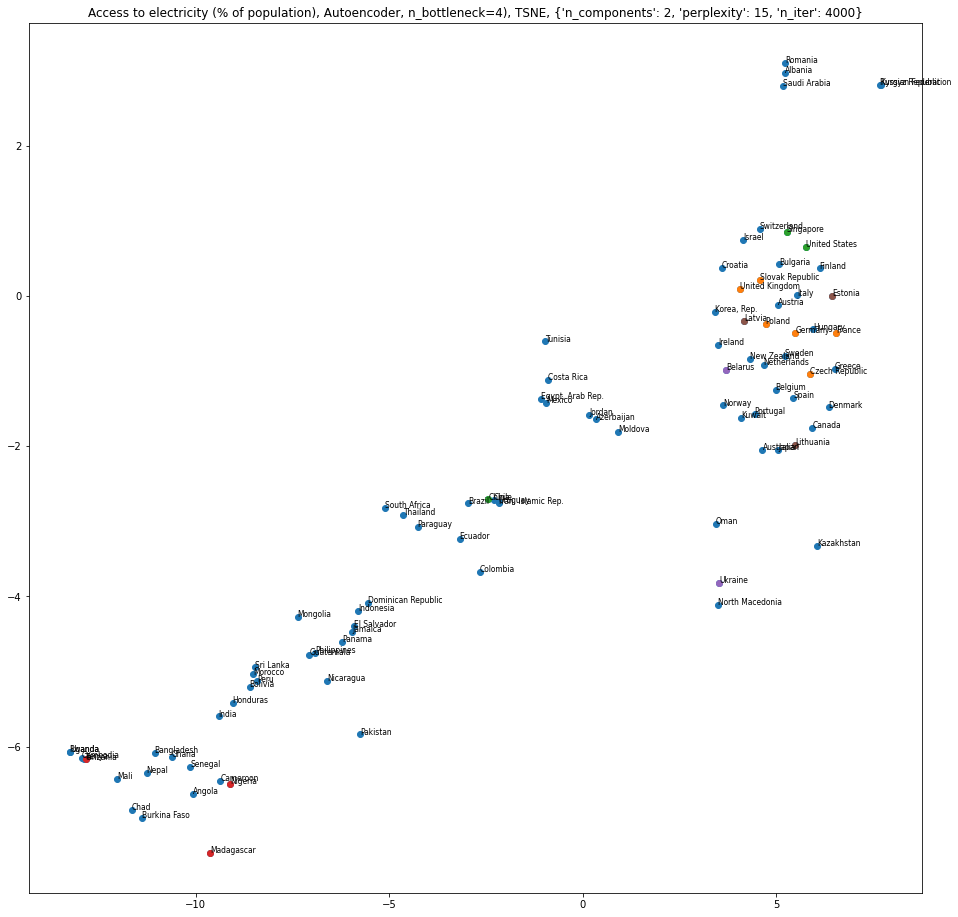

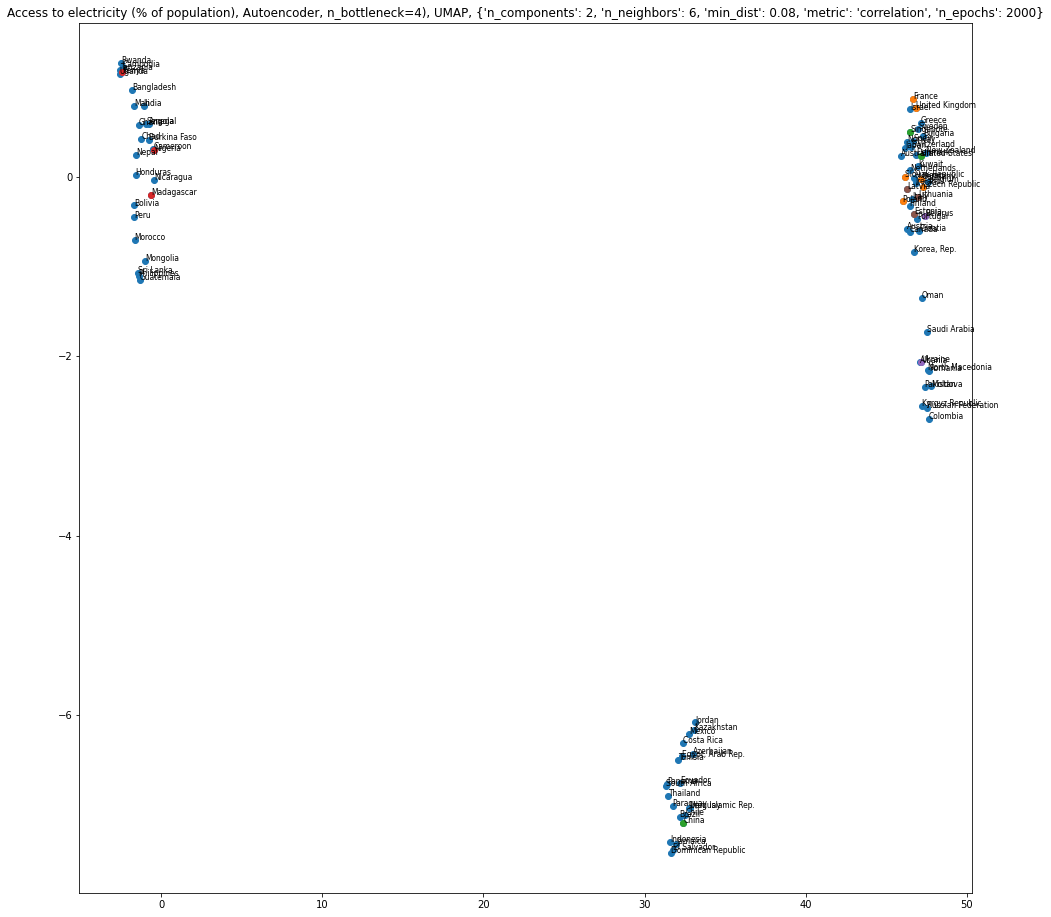

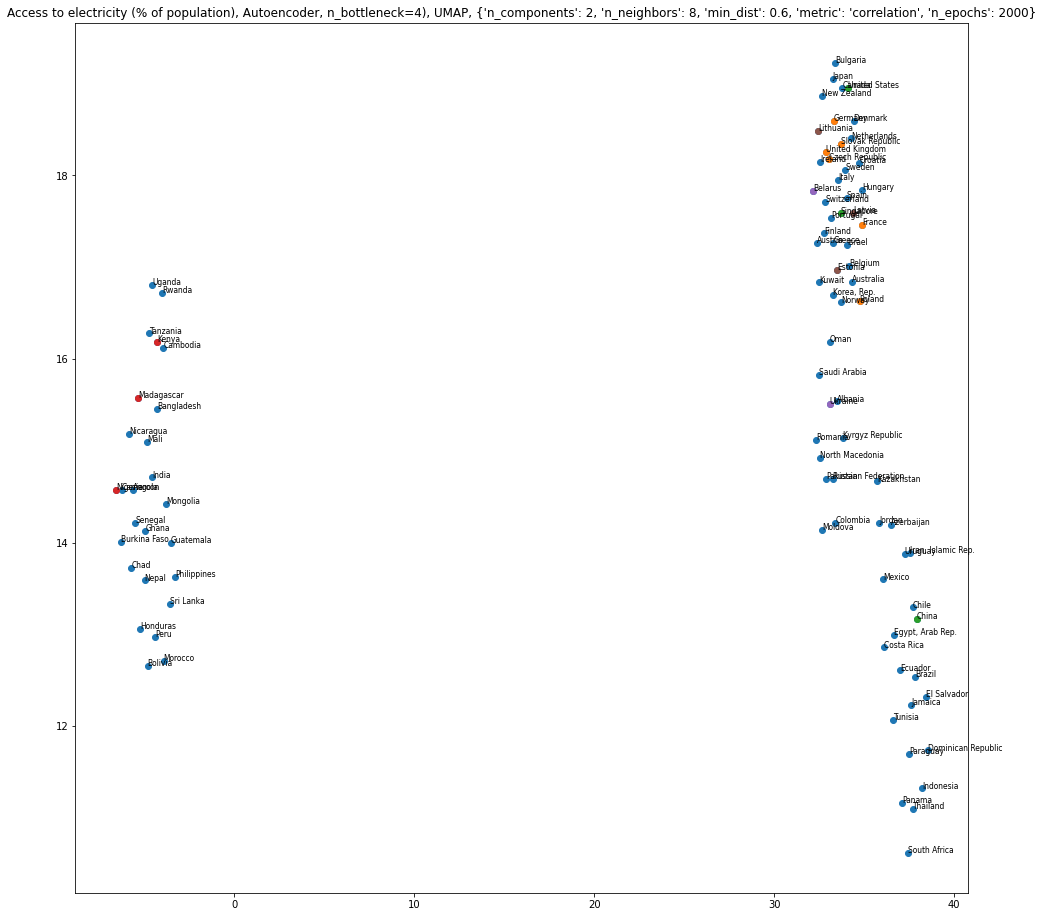

Agriculture, forestry, and fishing, value added (% of GDP)
-----------------------------------------
Autoencoder, n_bottleneck=4)
-----------------------------------------


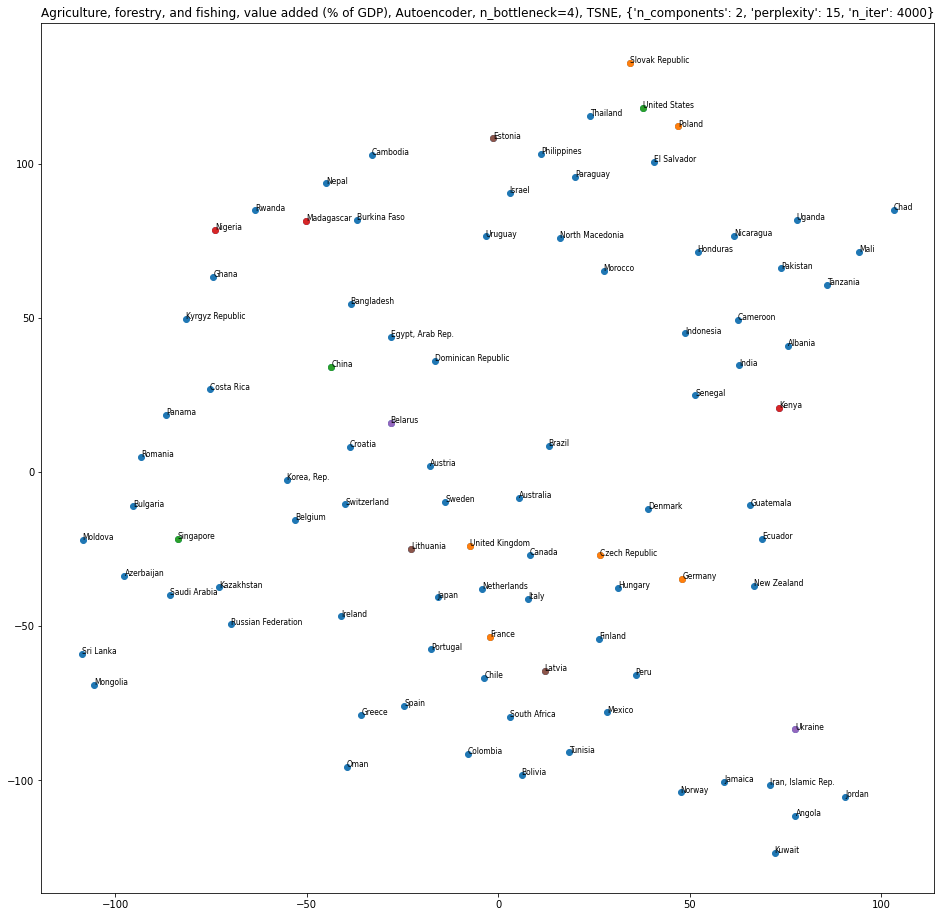

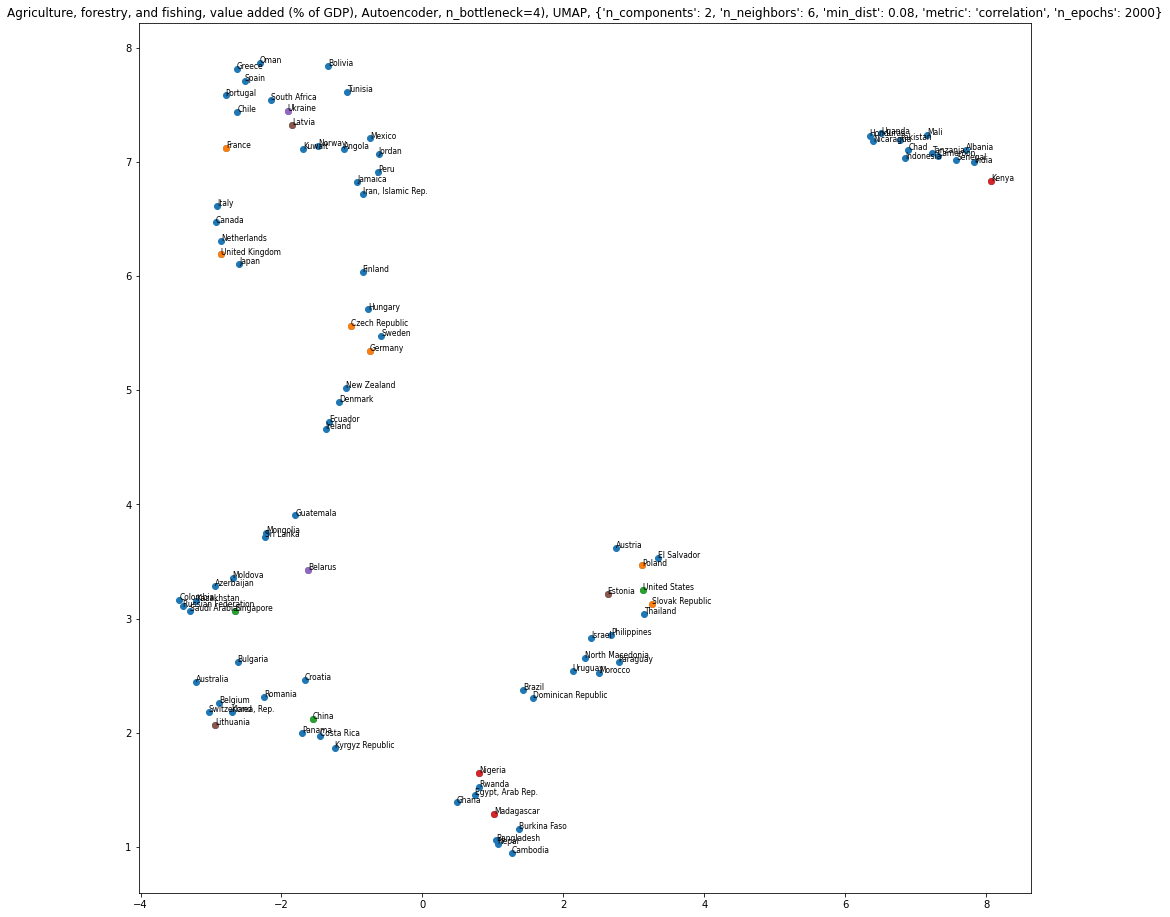

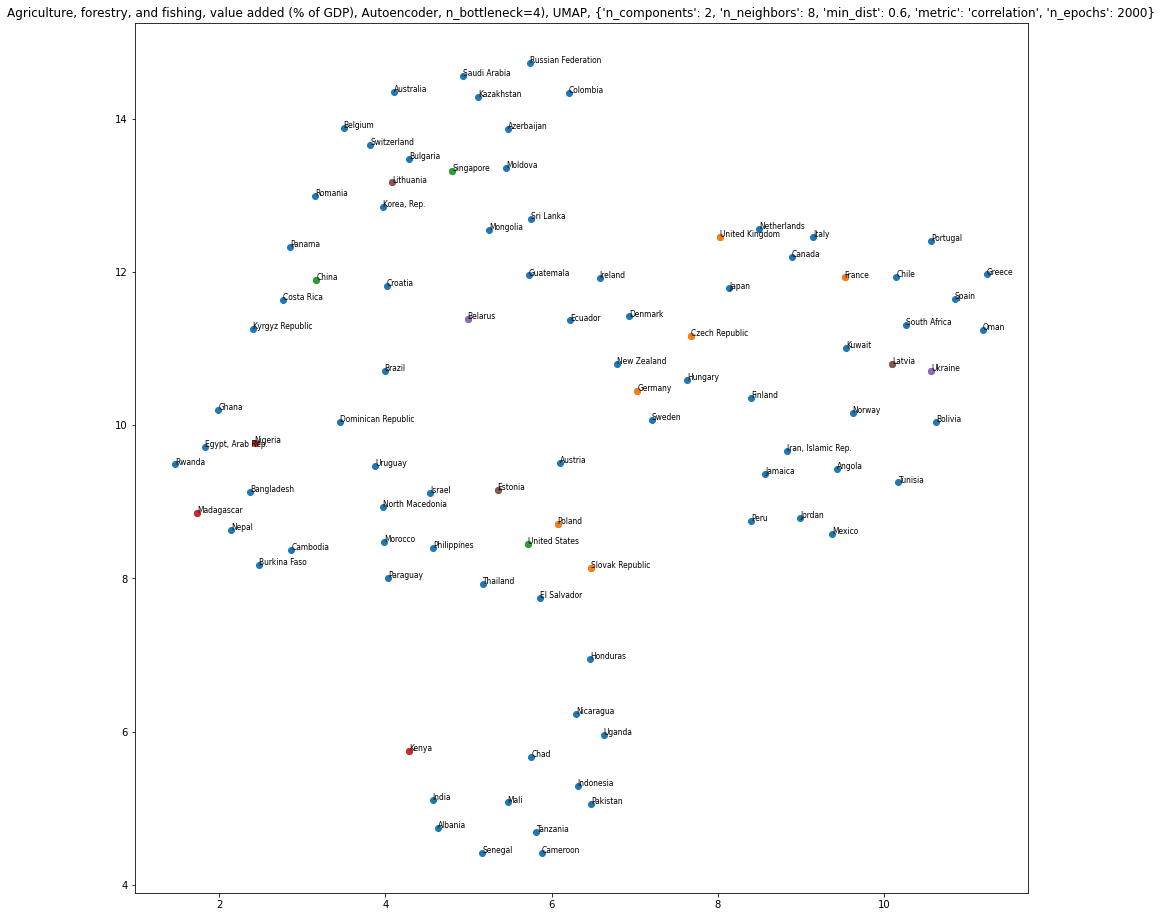

Exports of goods and services (% of GDP)
-----------------------------------------
Autoencoder, n_bottleneck=4)
-----------------------------------------


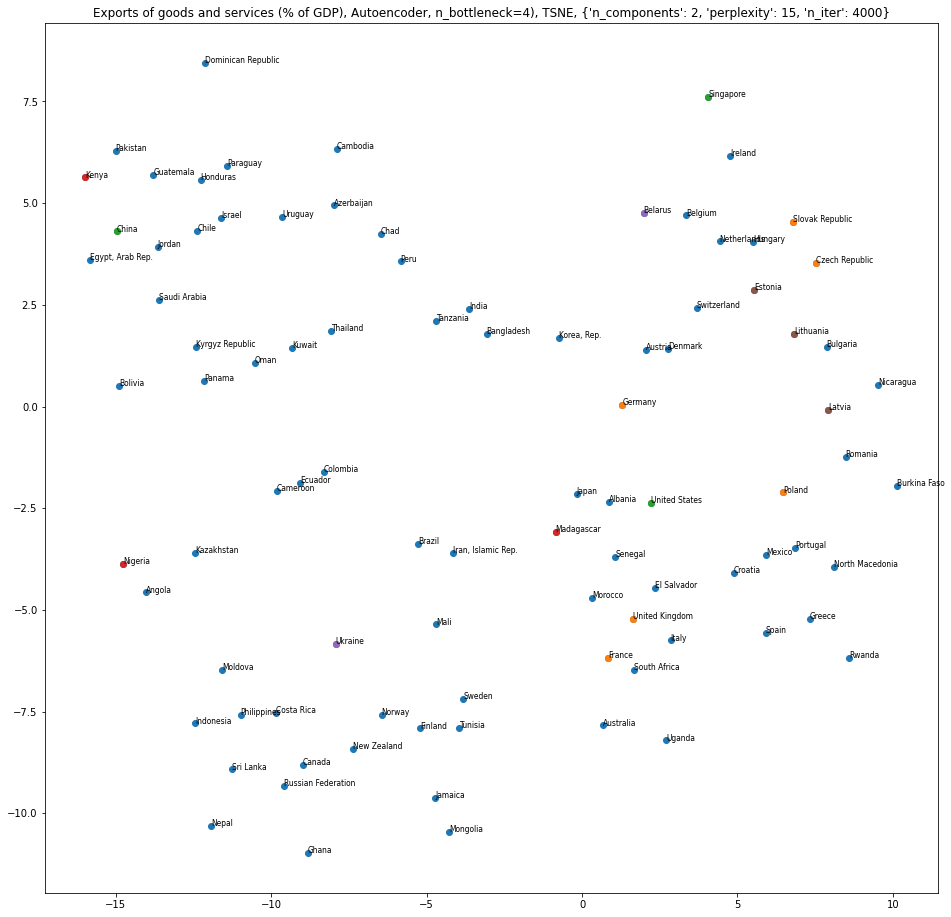

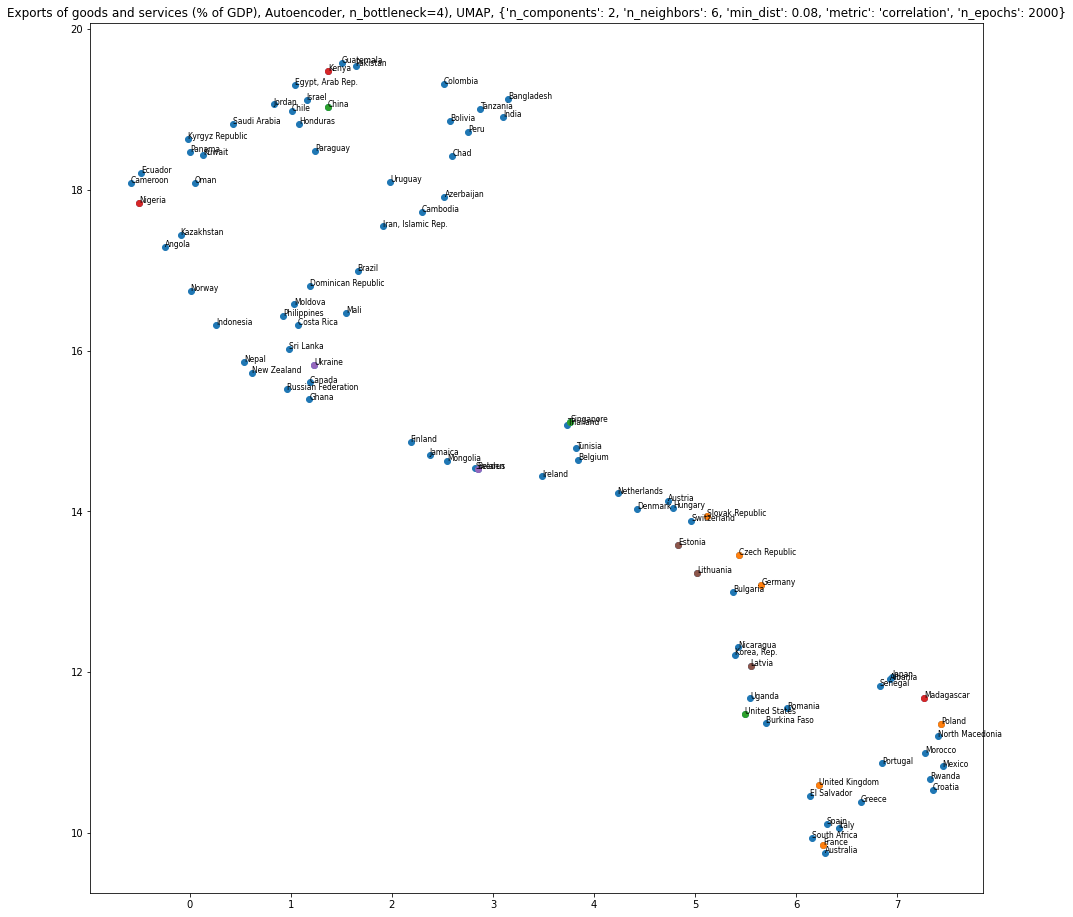

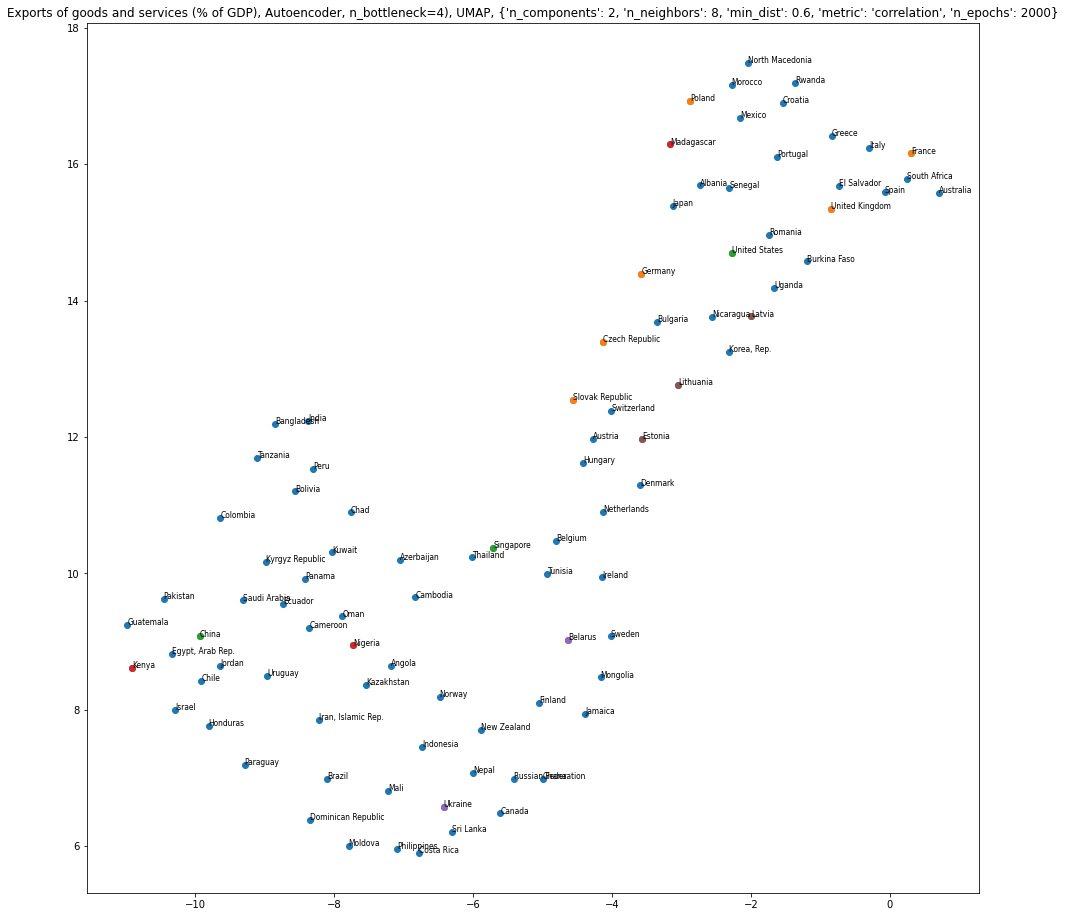

Fertility rate, total (births per woman)
-----------------------------------------
Autoencoder, n_bottleneck=4)
-----------------------------------------


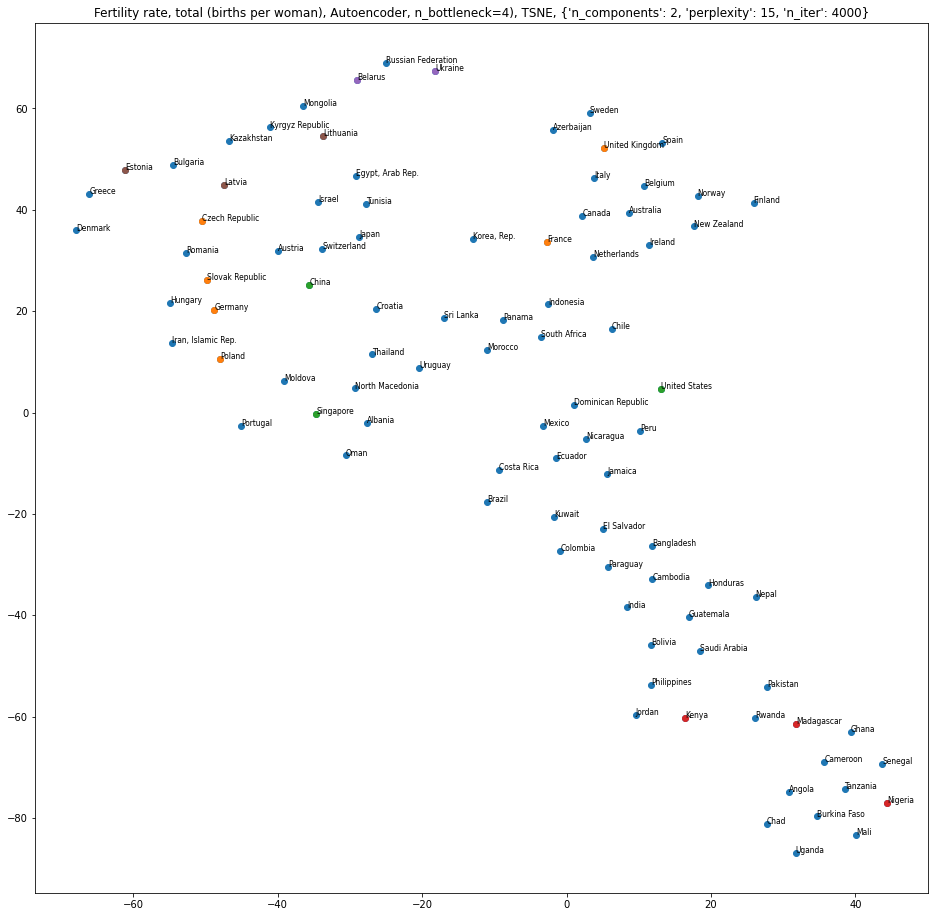

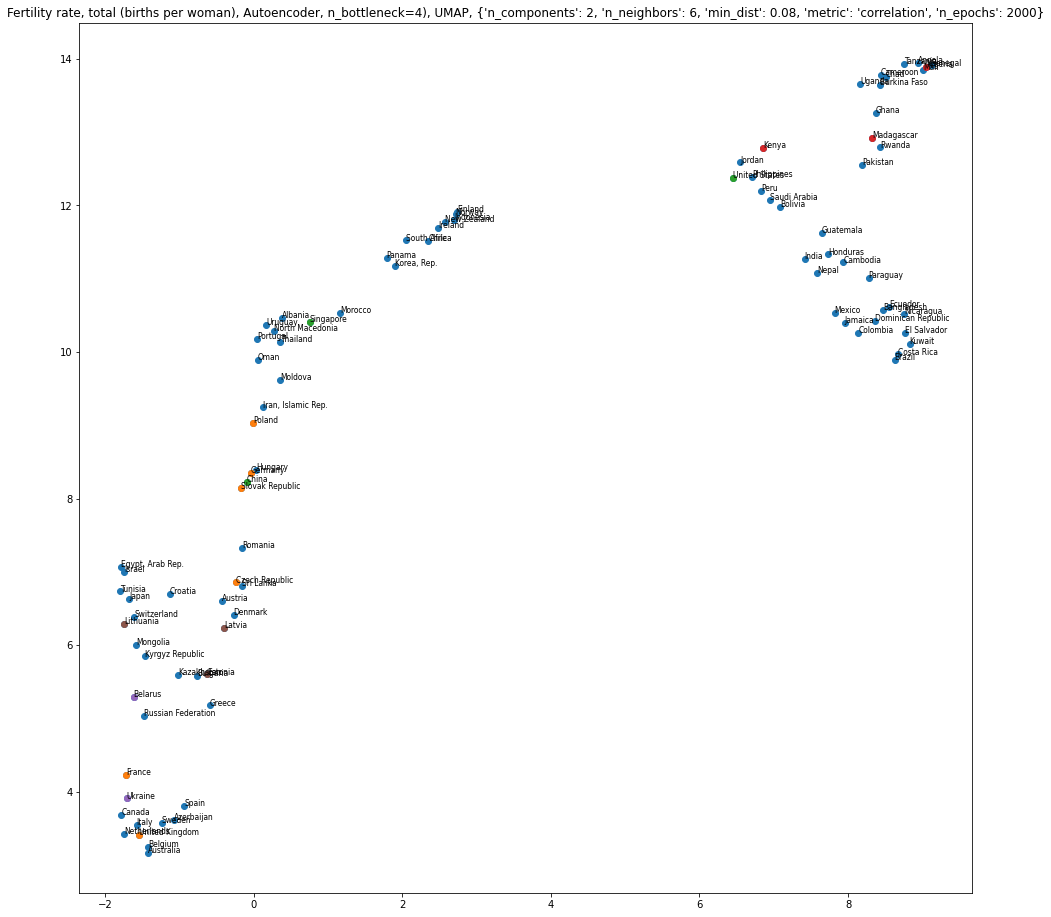

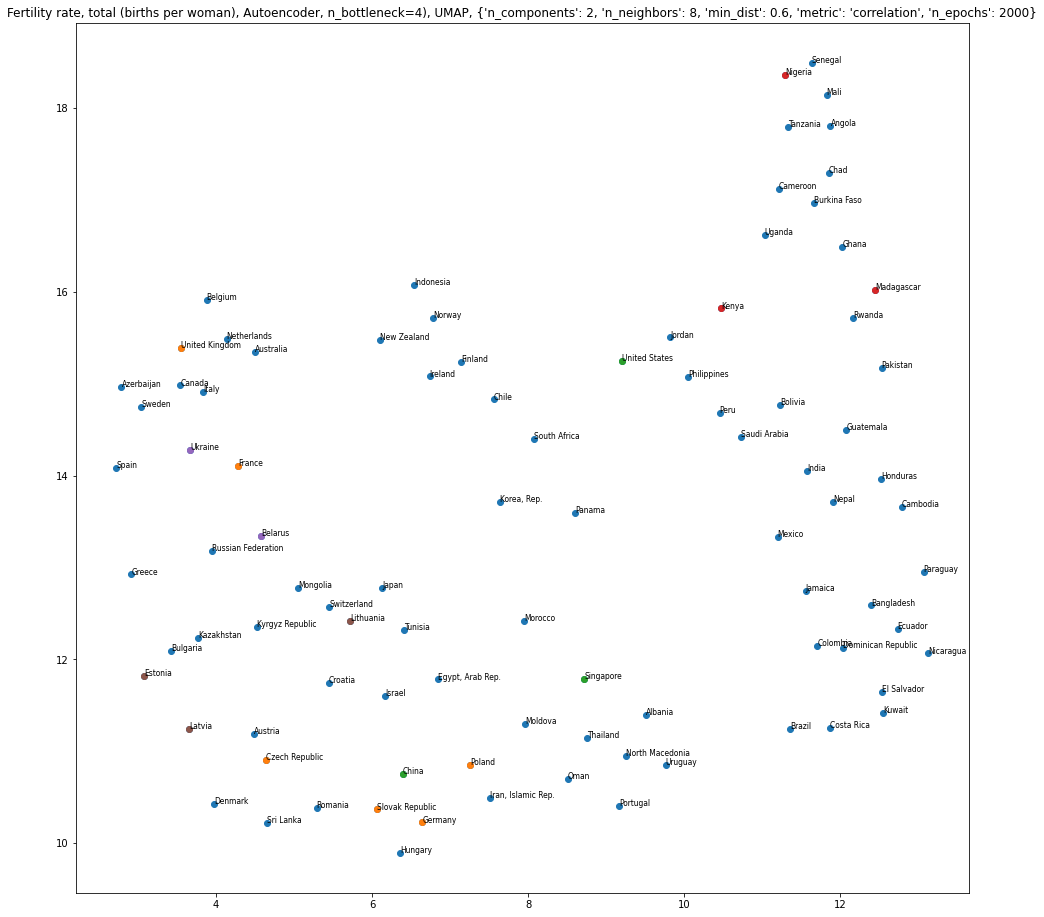

Forest area (% of land area)
-----------------------------------------
Autoencoder, n_bottleneck=4)
-----------------------------------------


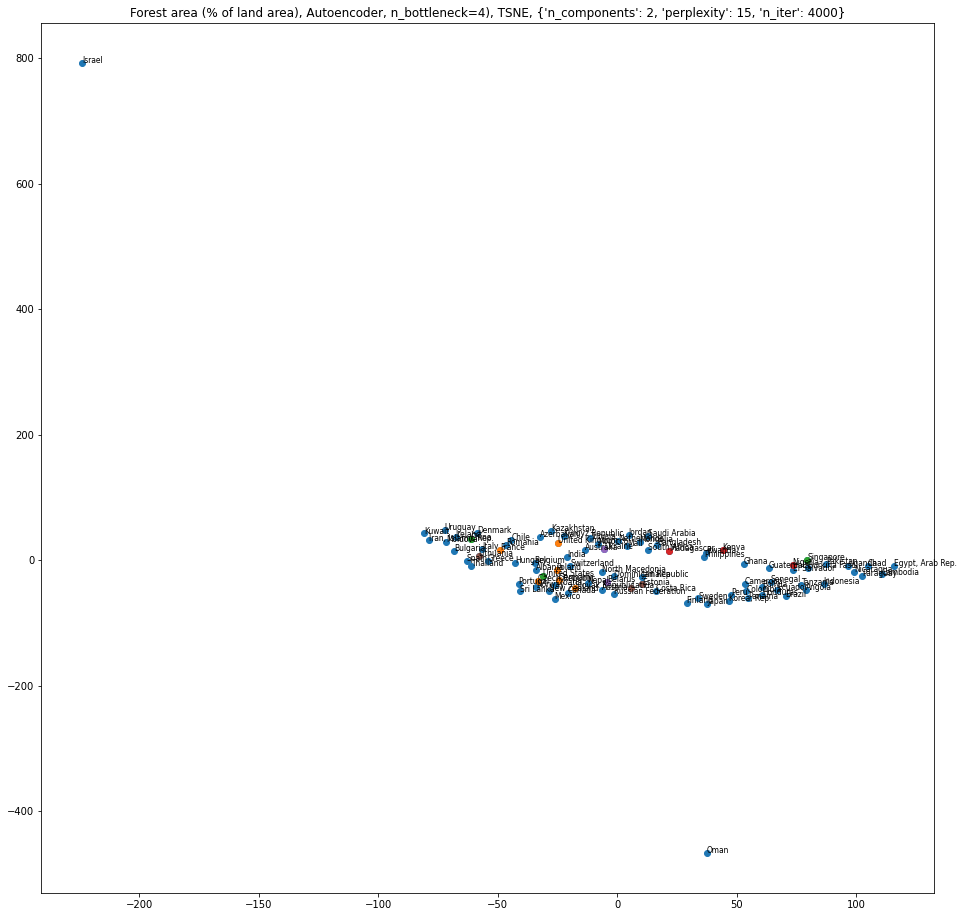

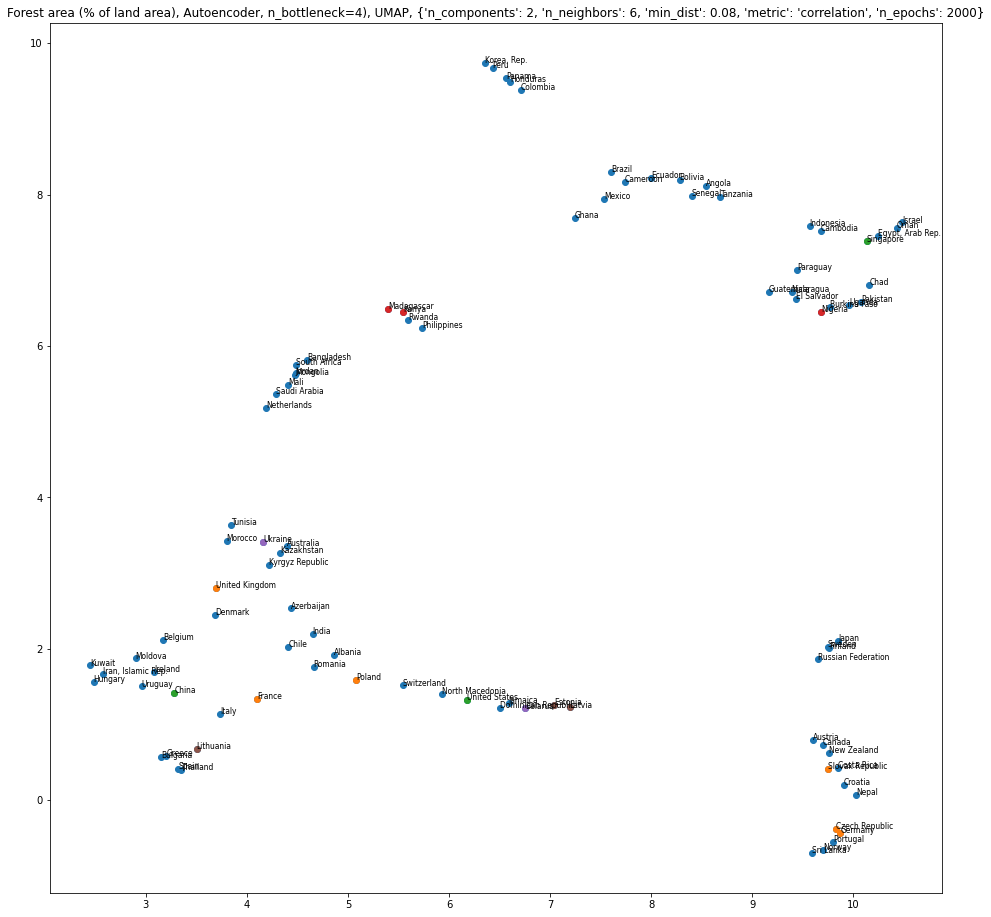

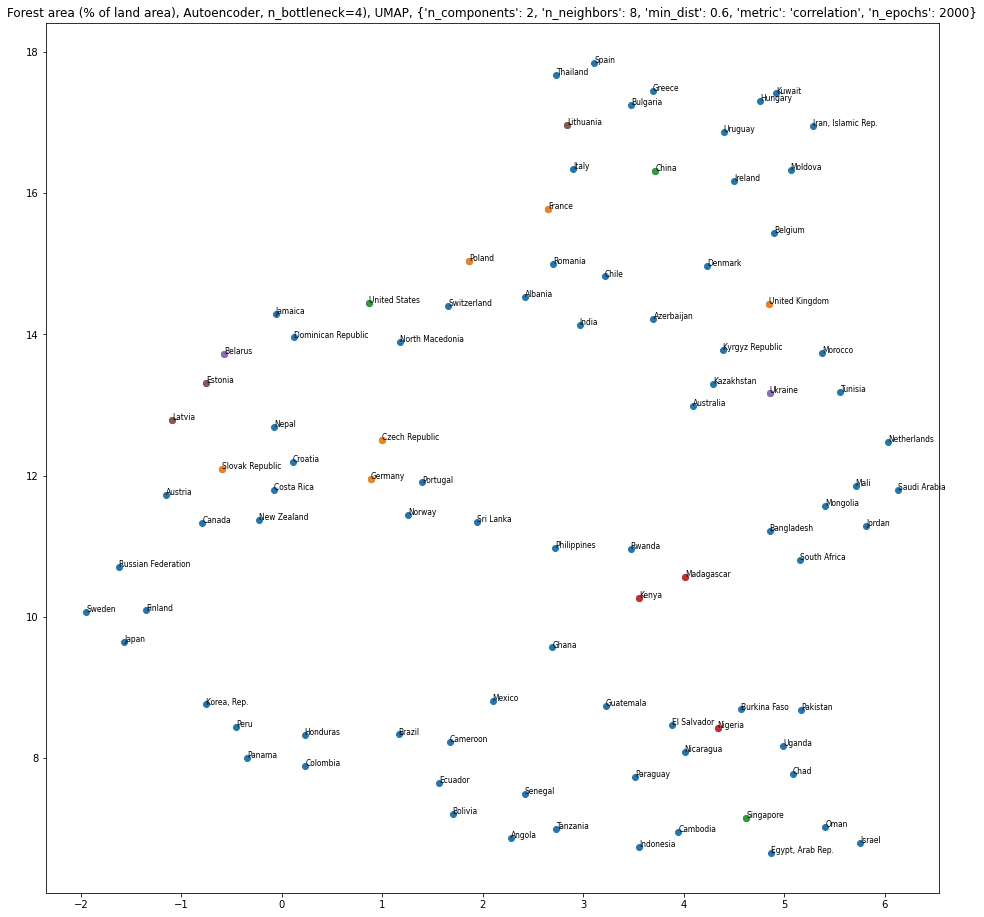

GDP growth (annual %)
-----------------------------------------
Autoencoder, n_bottleneck=4)
-----------------------------------------


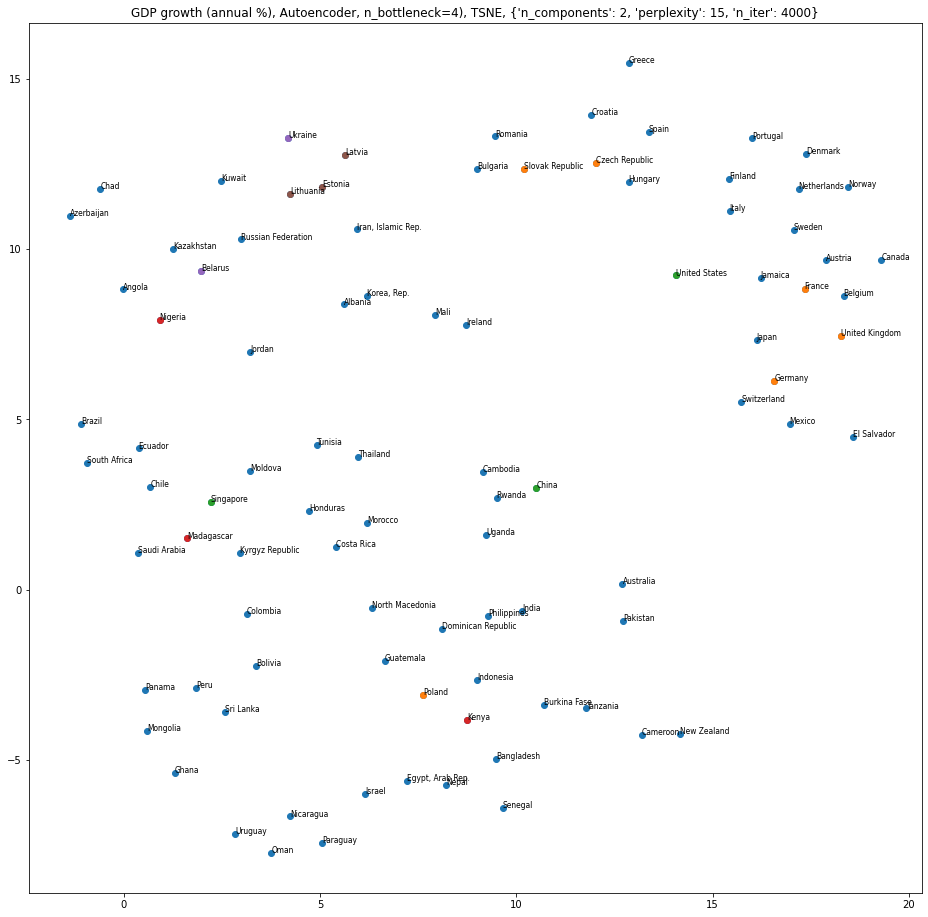

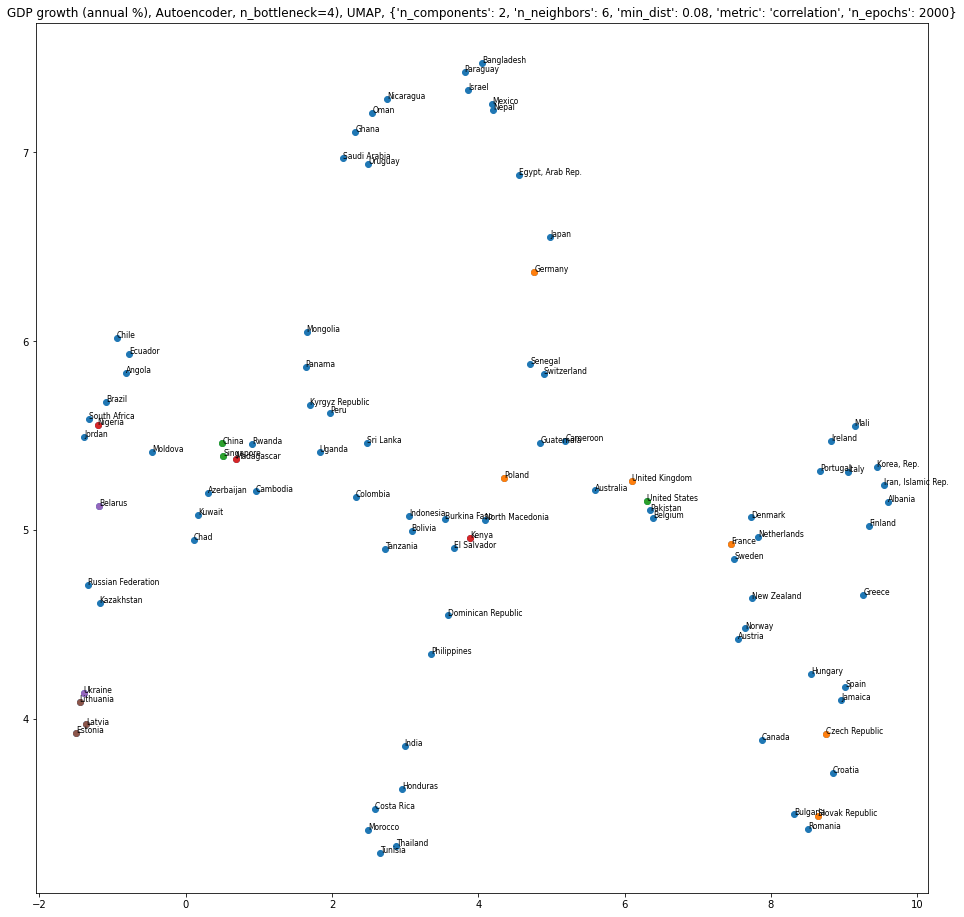

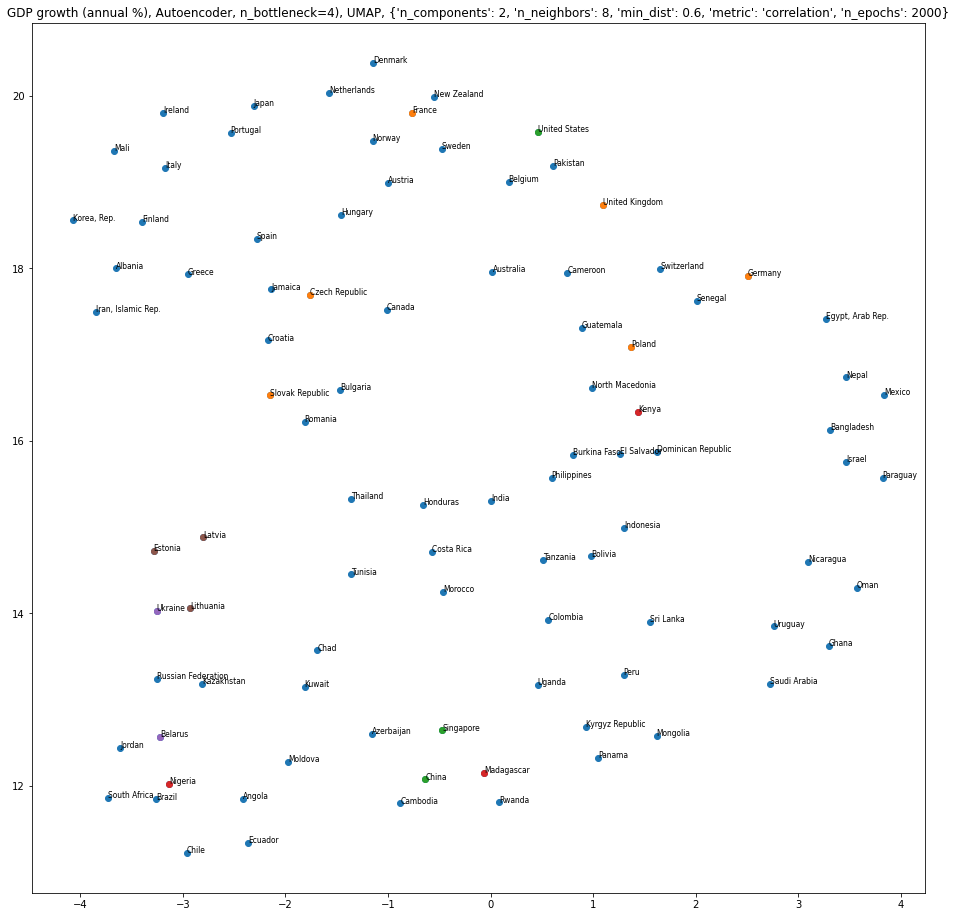

Inflation, consumer prices (annual %)
-----------------------------------------
Autoencoder, n_bottleneck=4)
-----------------------------------------


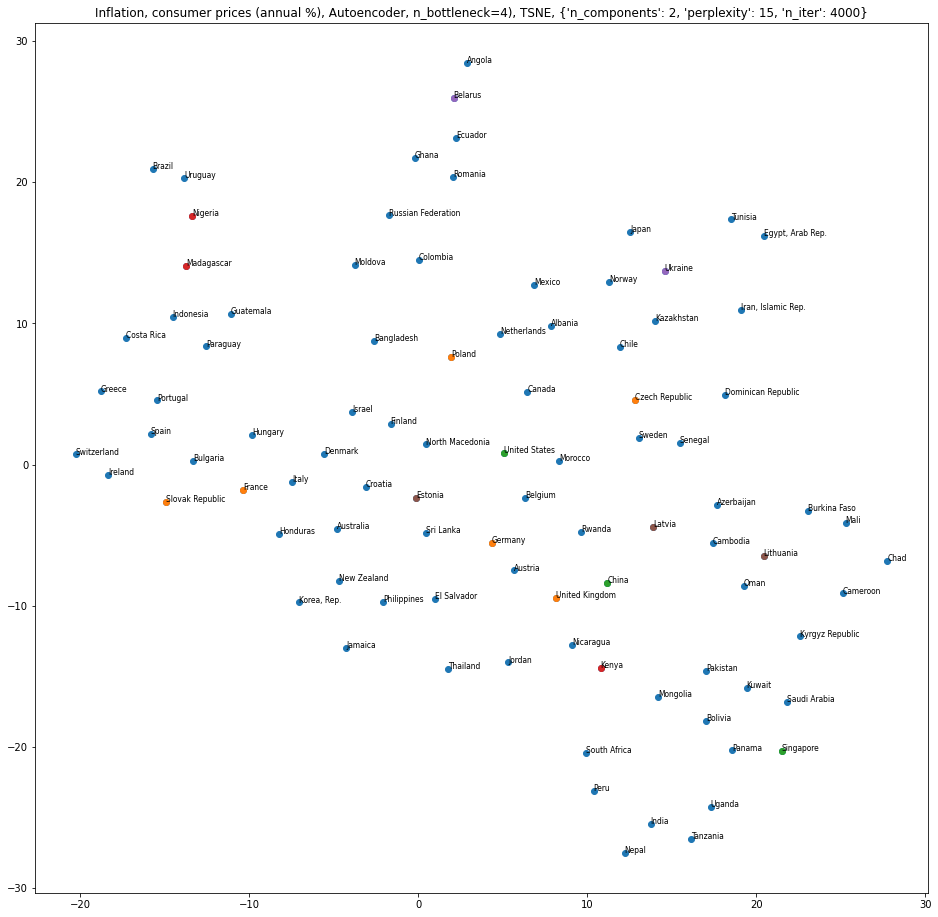

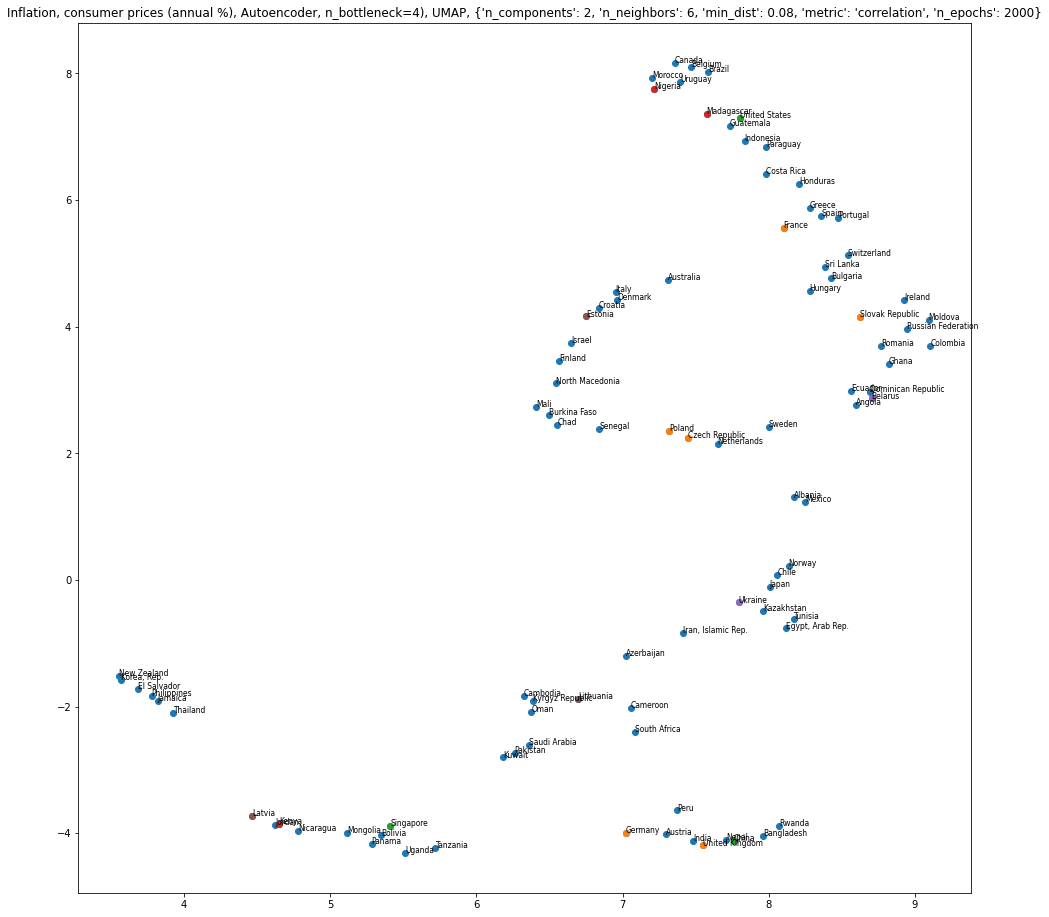

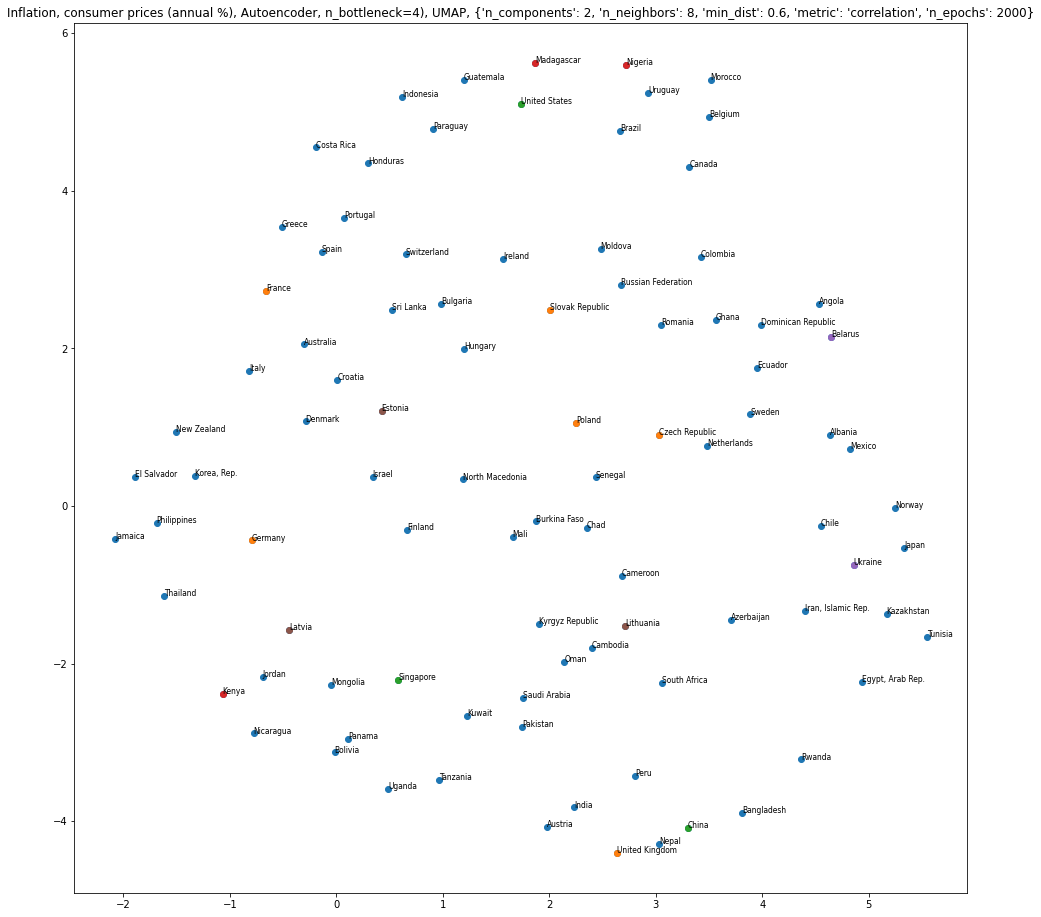

Life expectancy at birth, total (years)
-----------------------------------------
Autoencoder, n_bottleneck=4)
-----------------------------------------


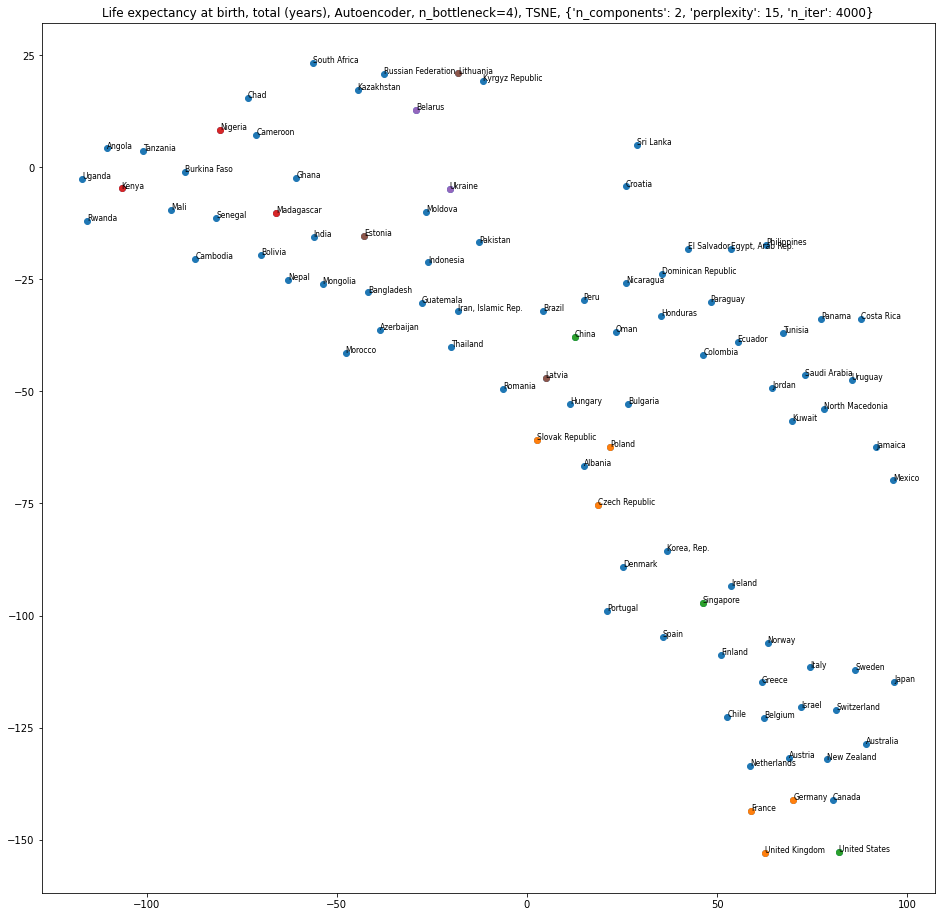

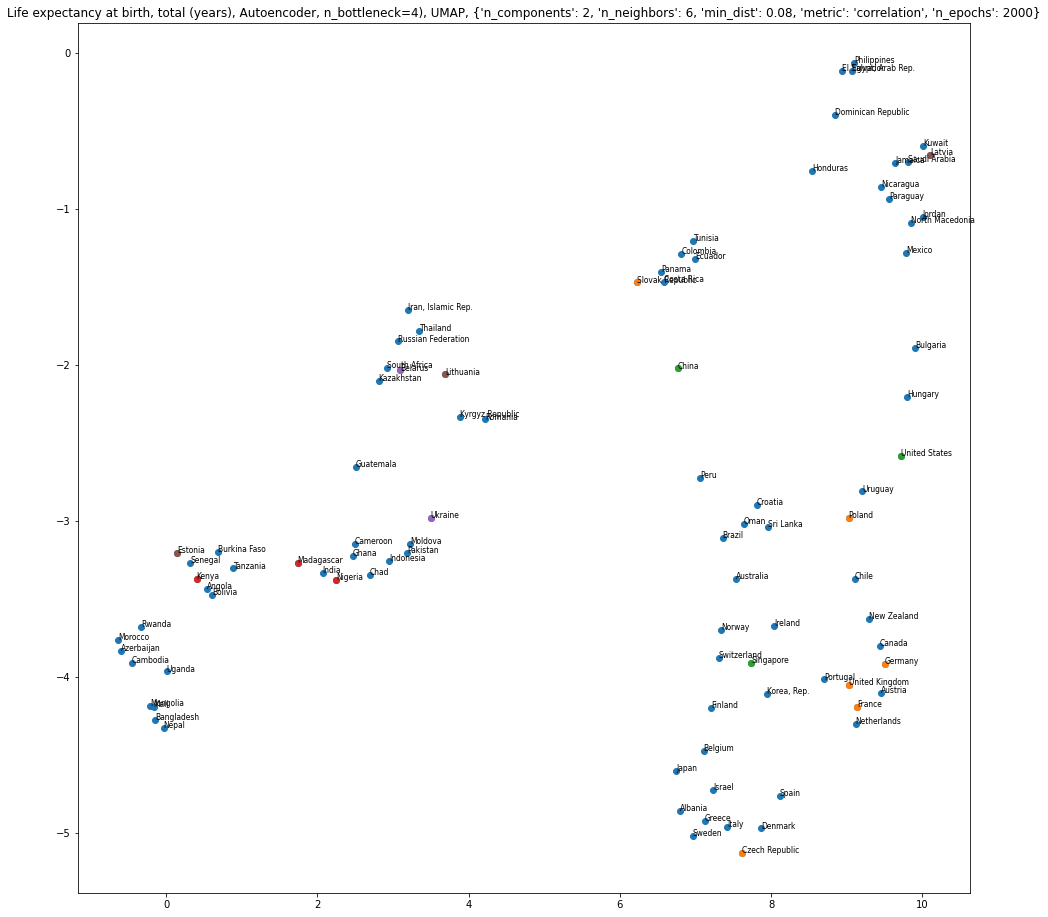

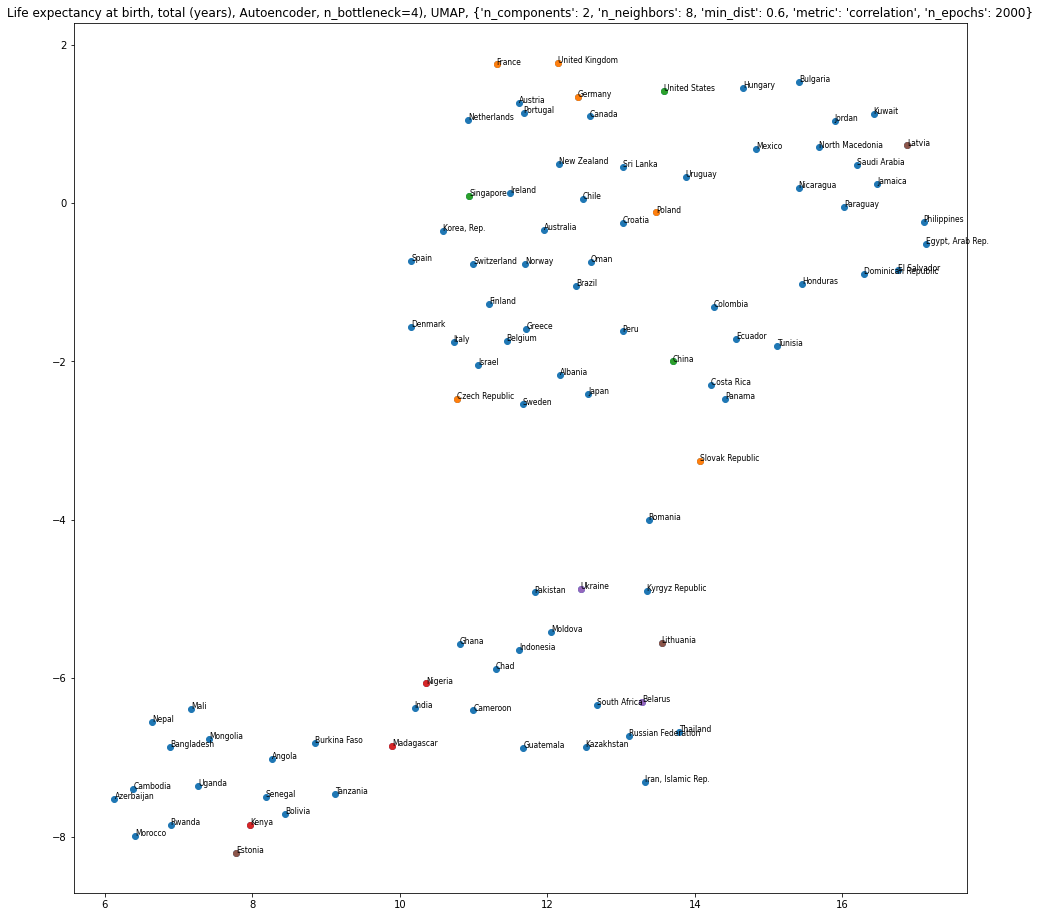

Merchandise trade (% of GDP)
-----------------------------------------
Autoencoder, n_bottleneck=4)
-----------------------------------------


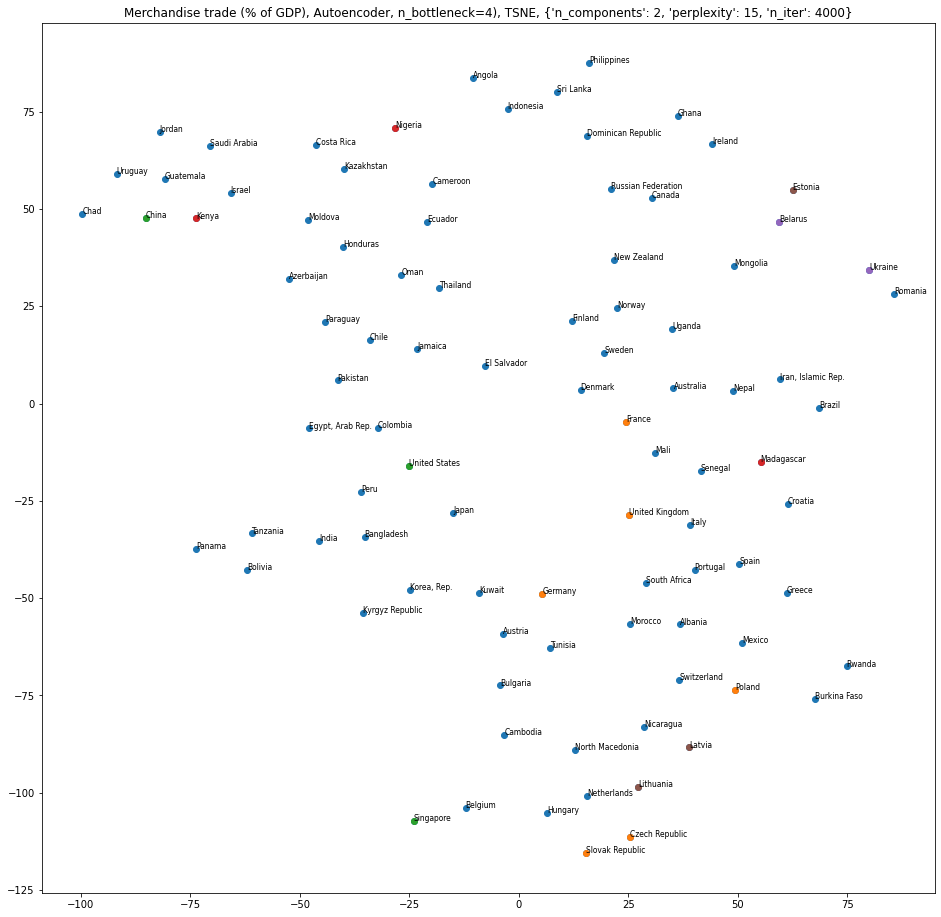

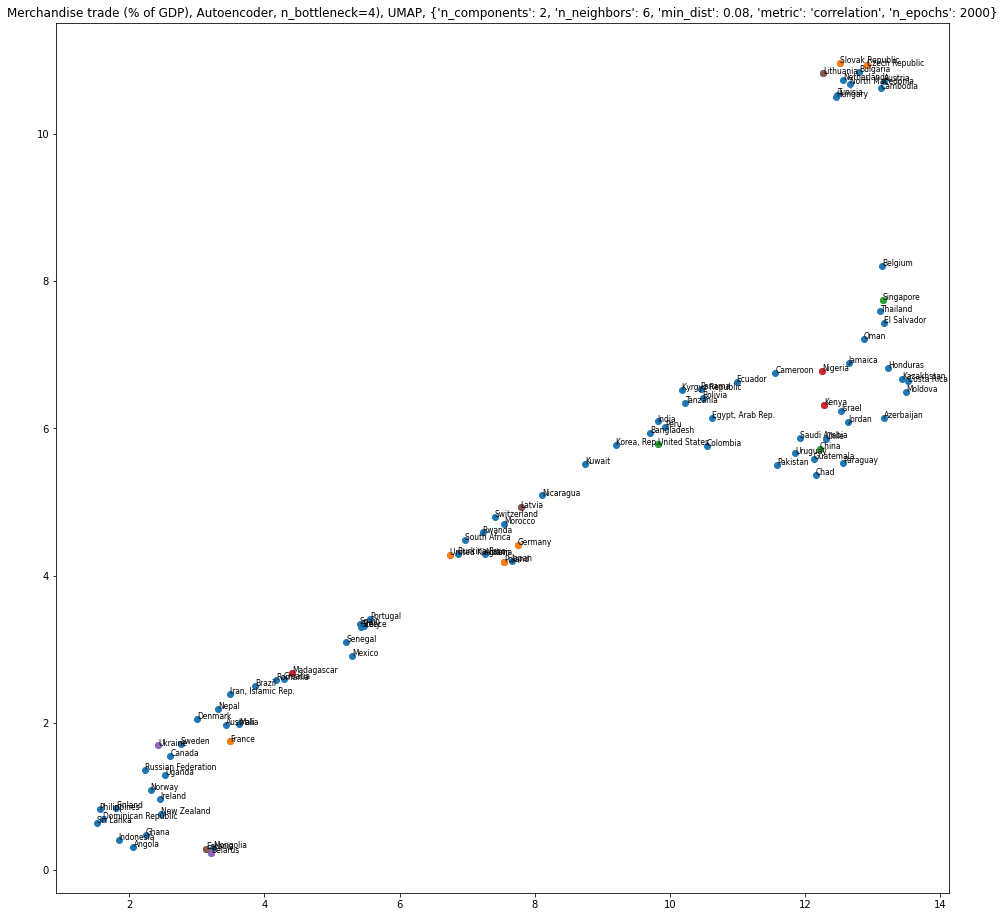

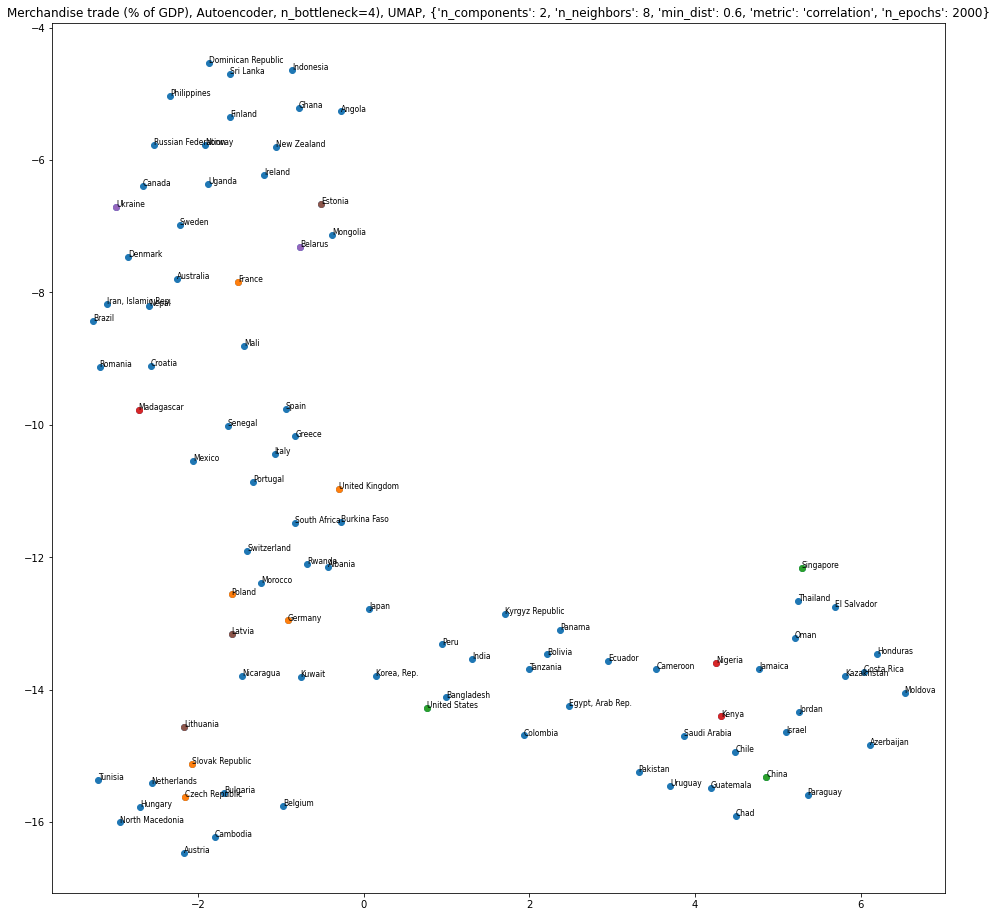

Military expenditure (% of GDP)
-----------------------------------------
Autoencoder, n_bottleneck=4)
-----------------------------------------


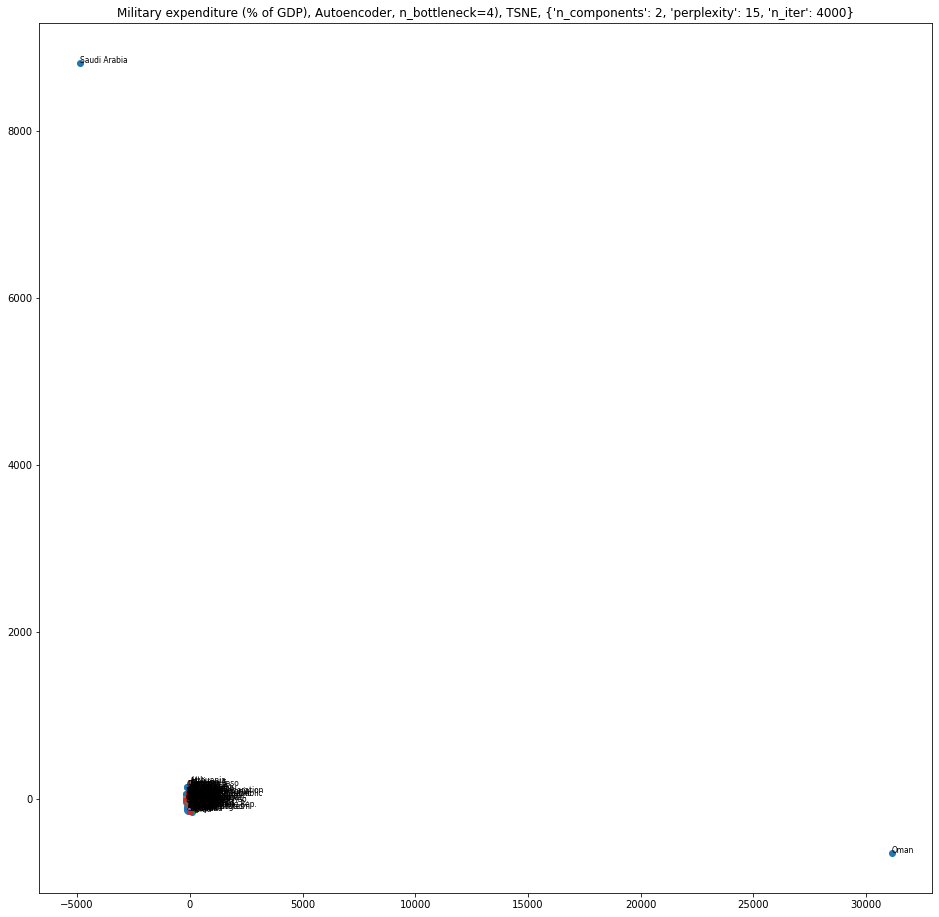

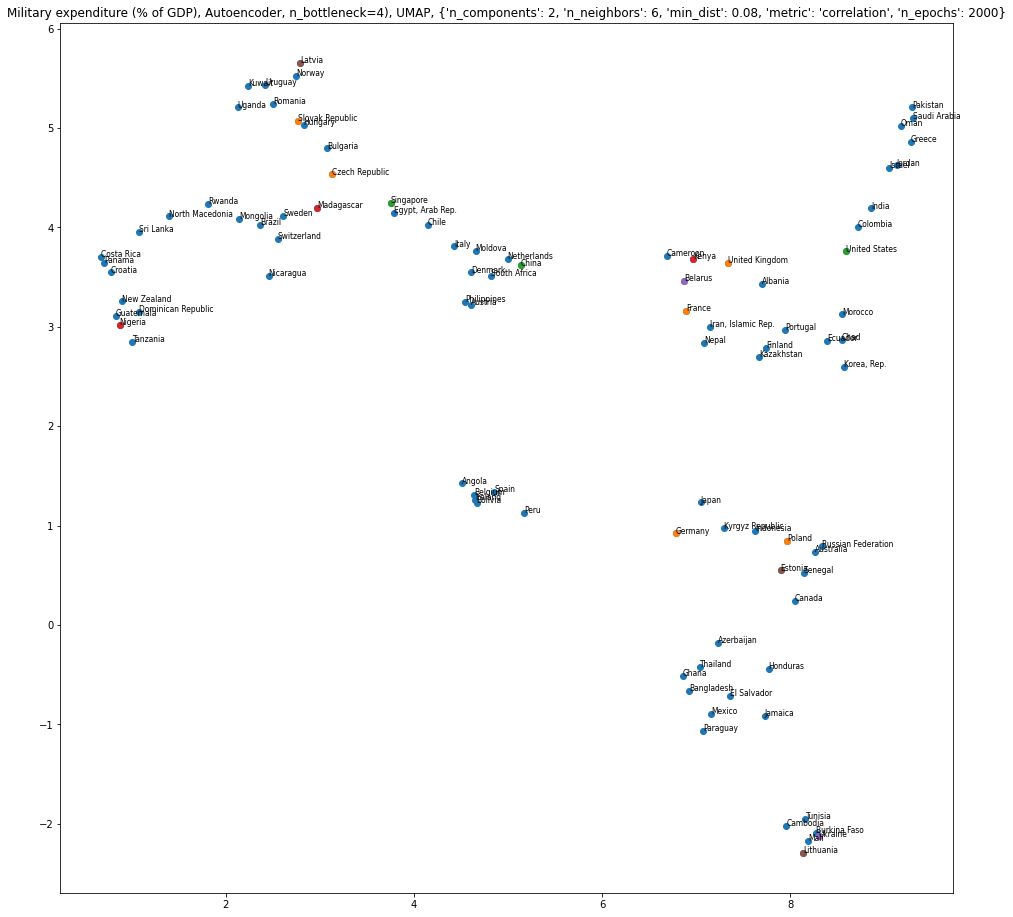

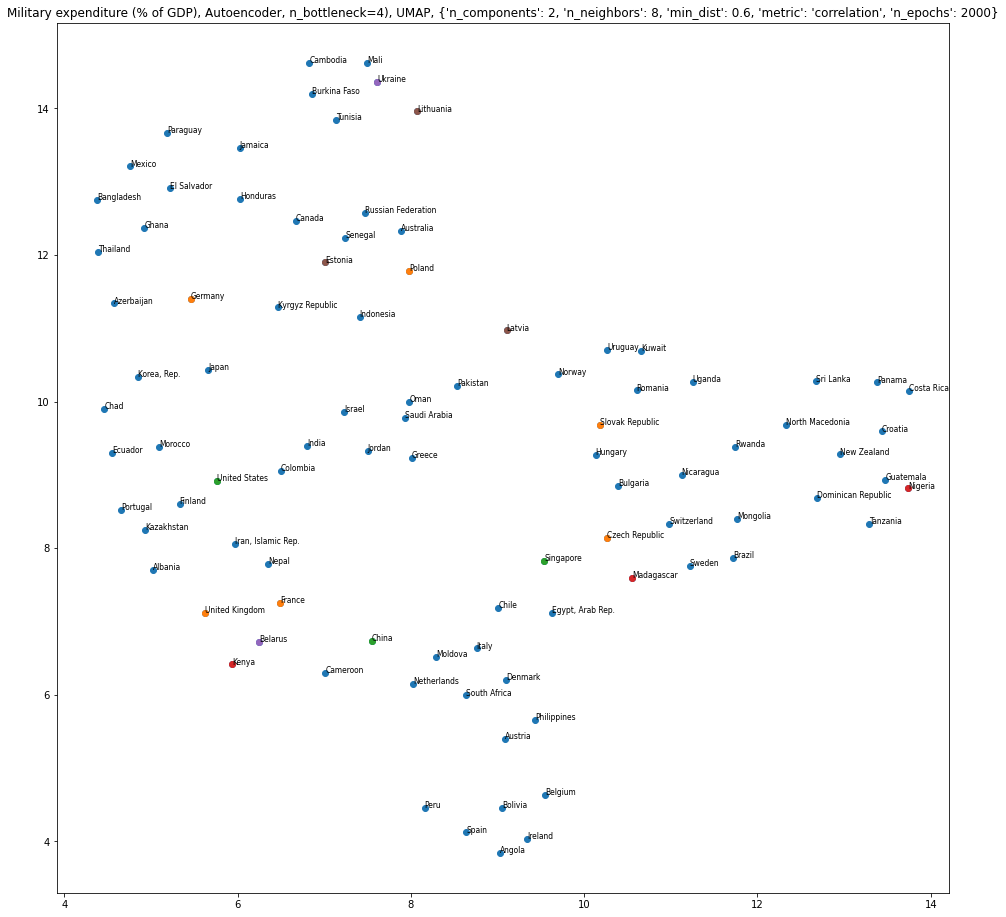

Mortality rate, under-5 (per 1,000 live births)
-----------------------------------------
Autoencoder, n_bottleneck=4)
-----------------------------------------


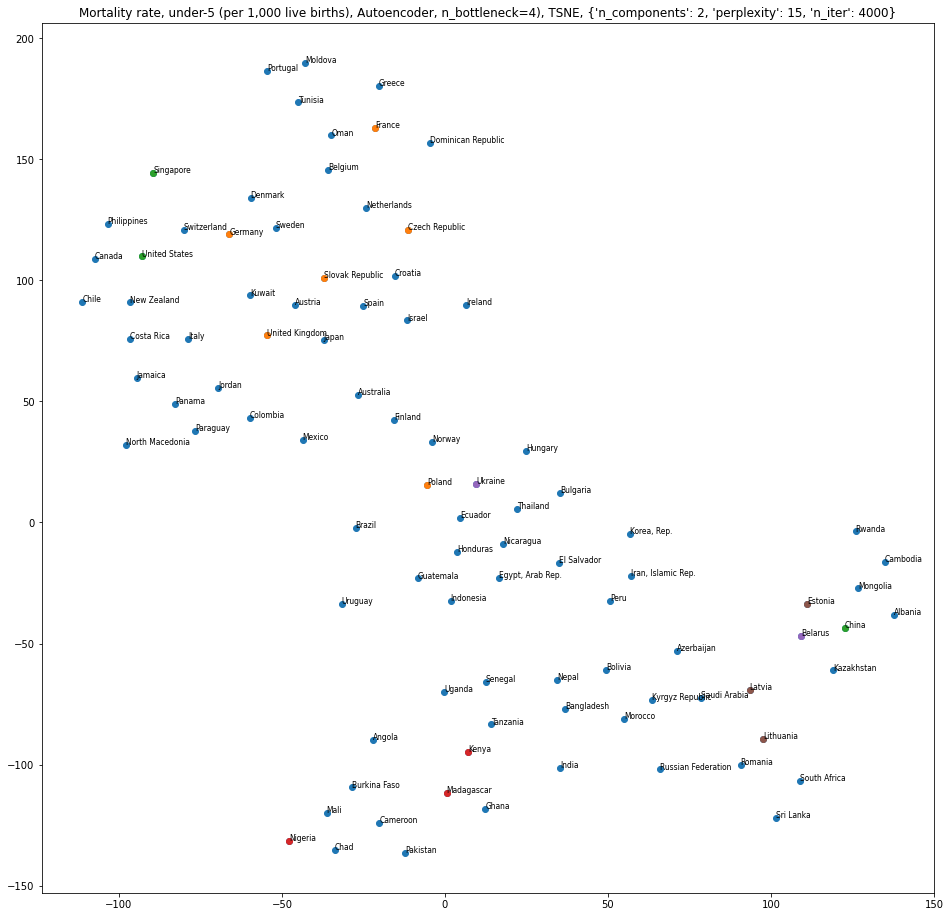

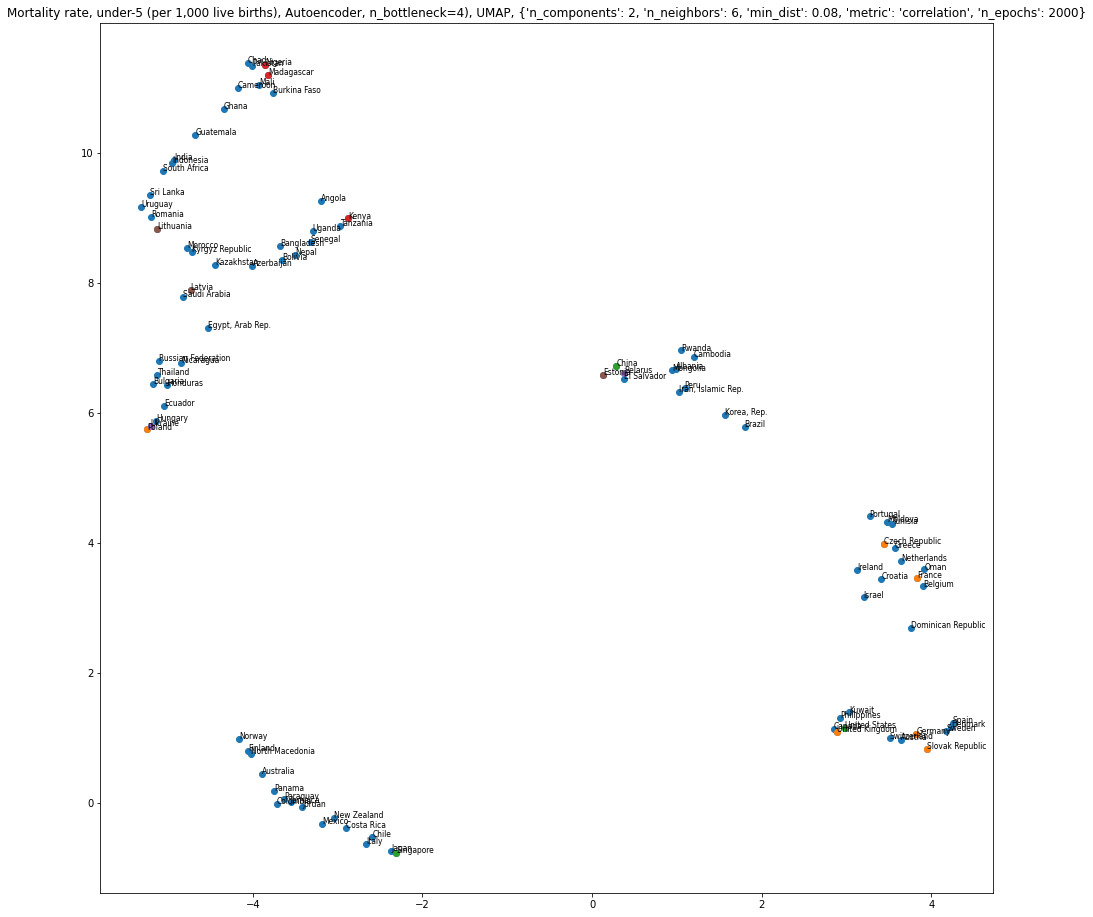

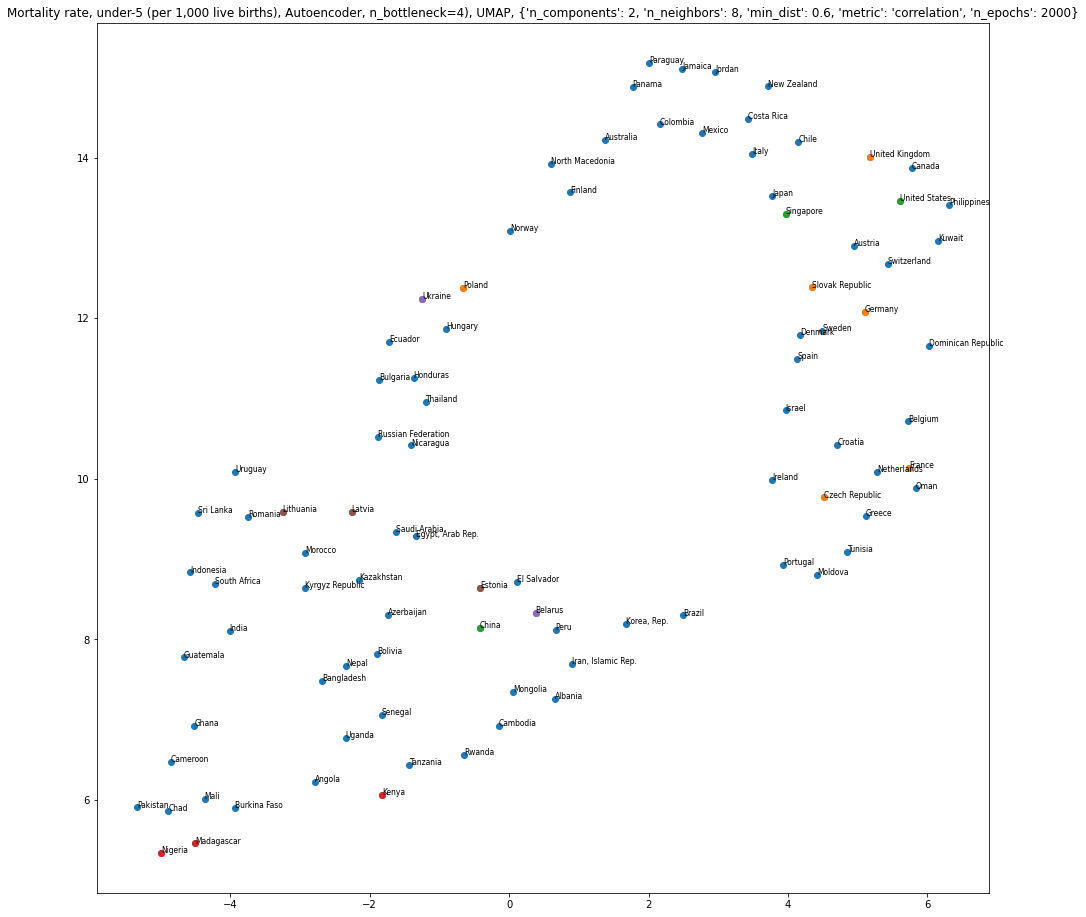

Population growth (annual %)
-----------------------------------------
Autoencoder, n_bottleneck=4)
-----------------------------------------


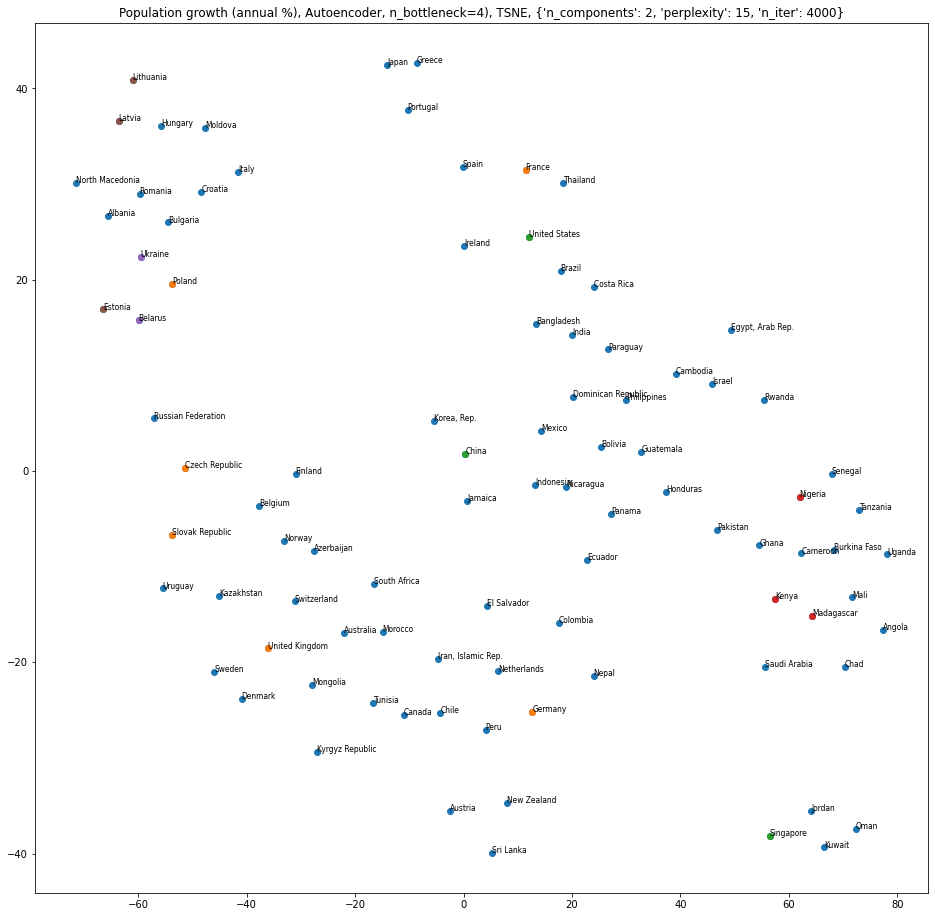

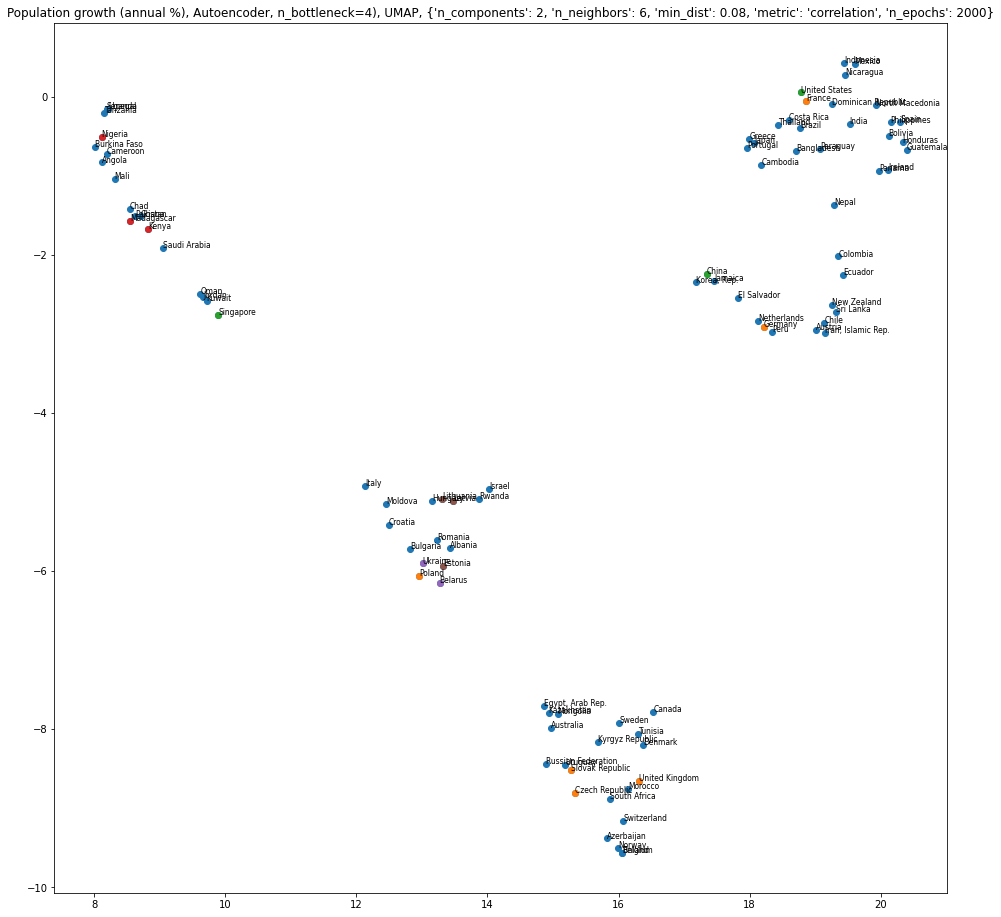

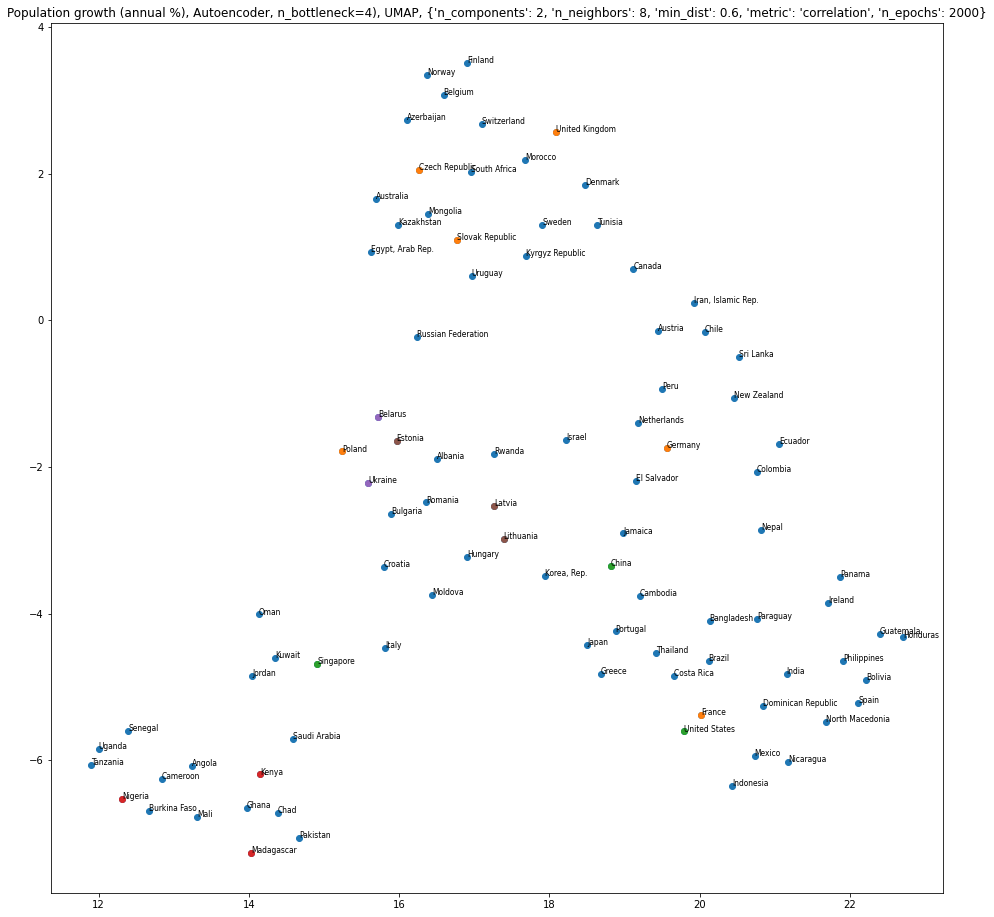

Population in the largest city (% of urban population)
-----------------------------------------
Autoencoder, n_bottleneck=4)
-----------------------------------------


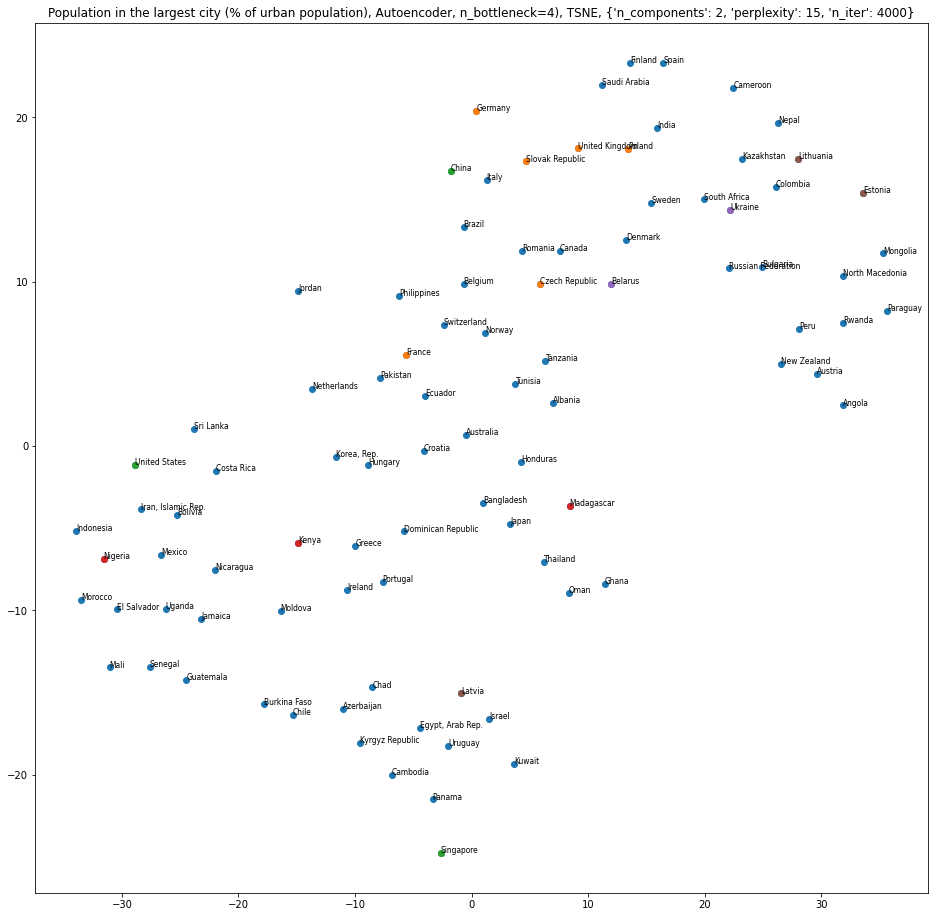

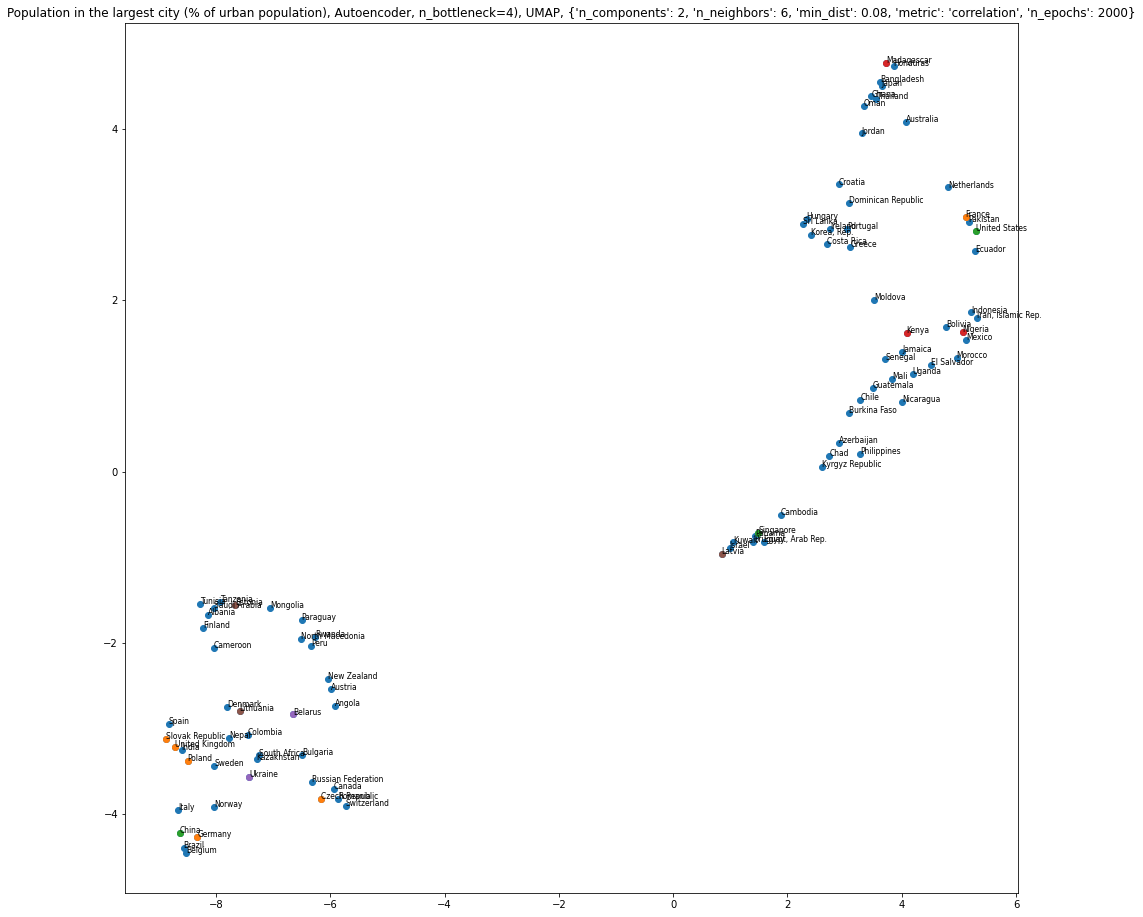

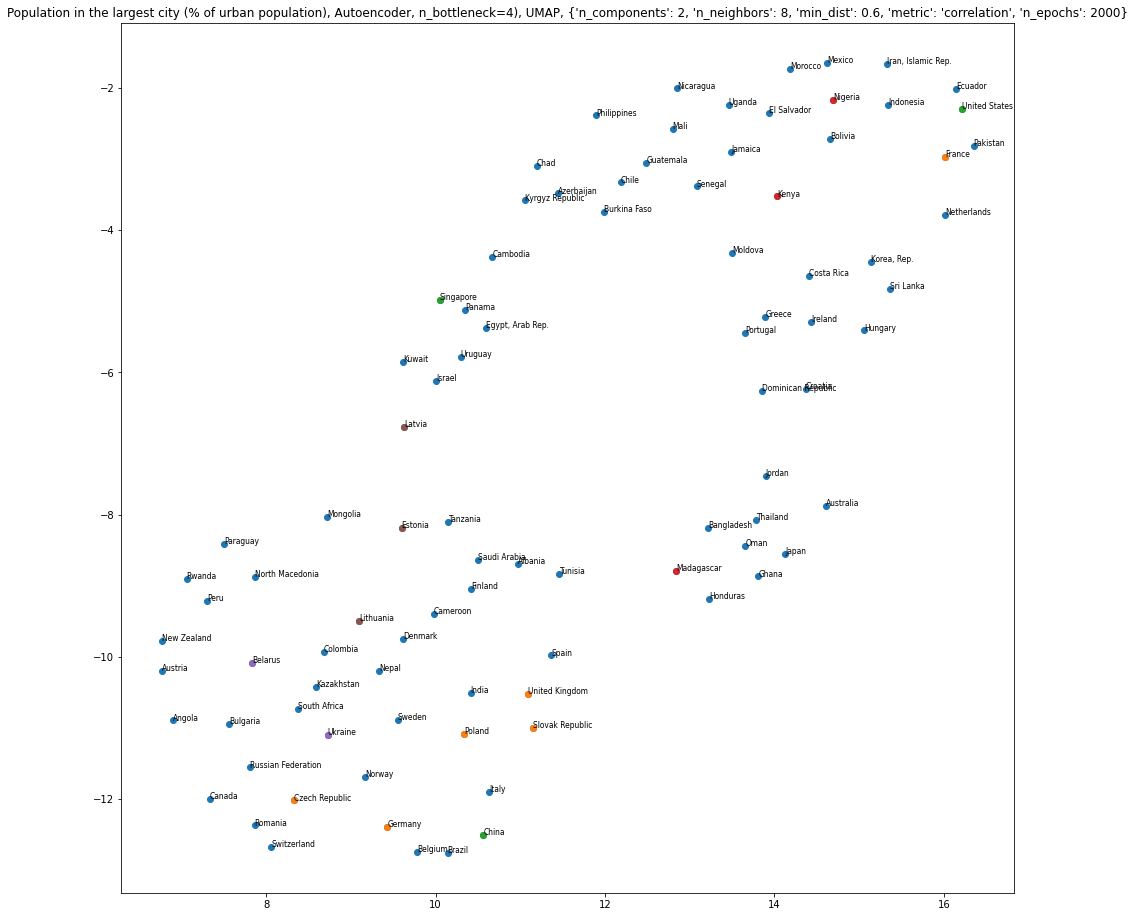

Total natural resources rents (% of GDP)
-----------------------------------------
Autoencoder, n_bottleneck=4)
-----------------------------------------


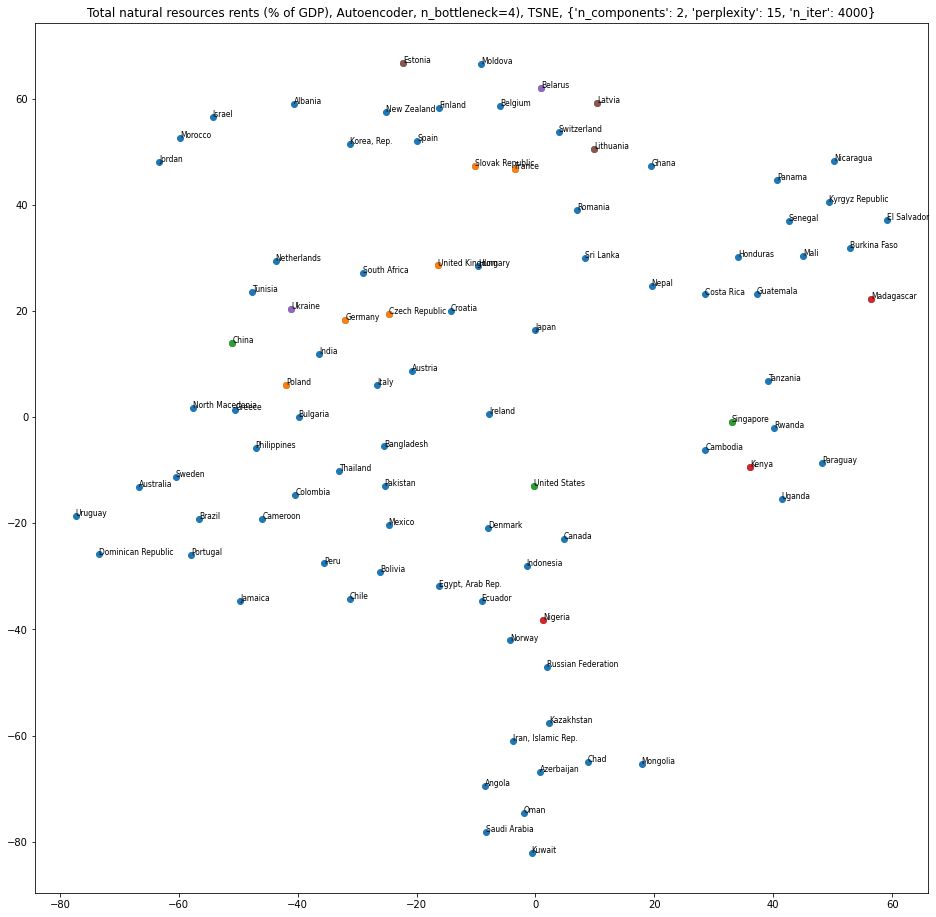

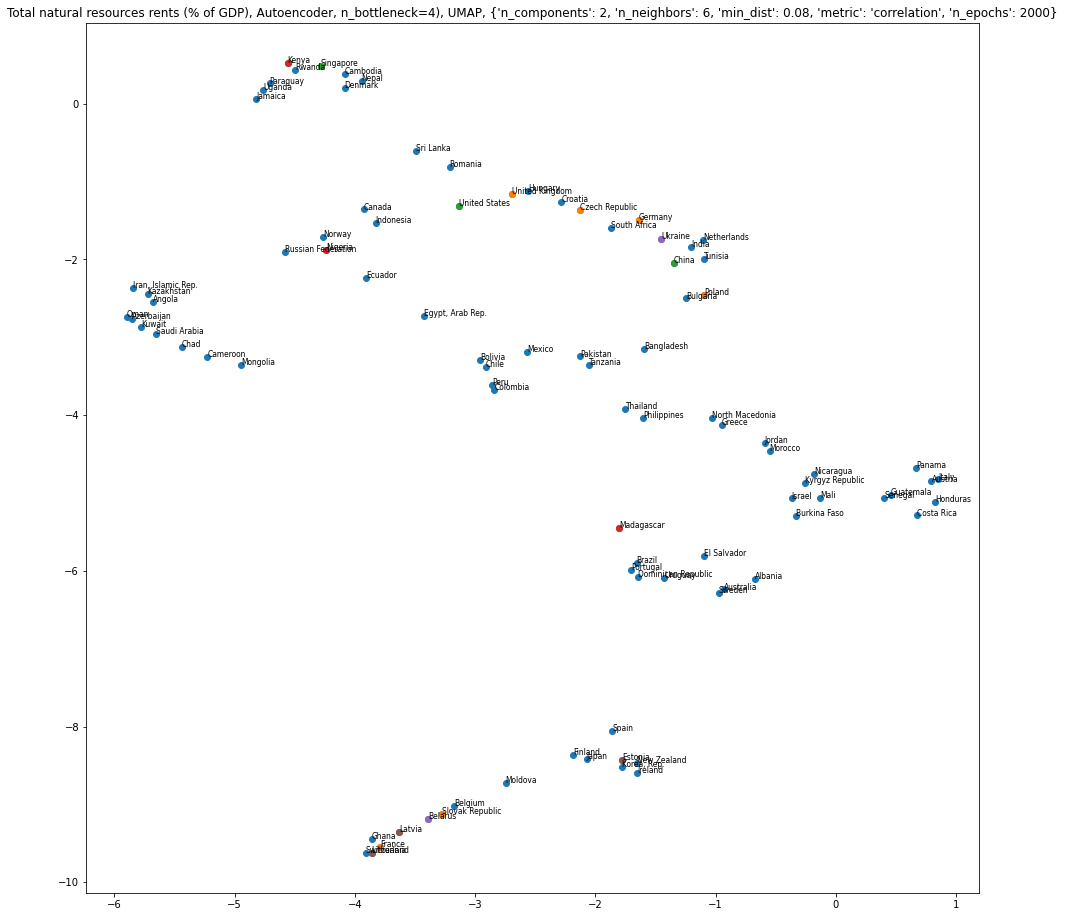

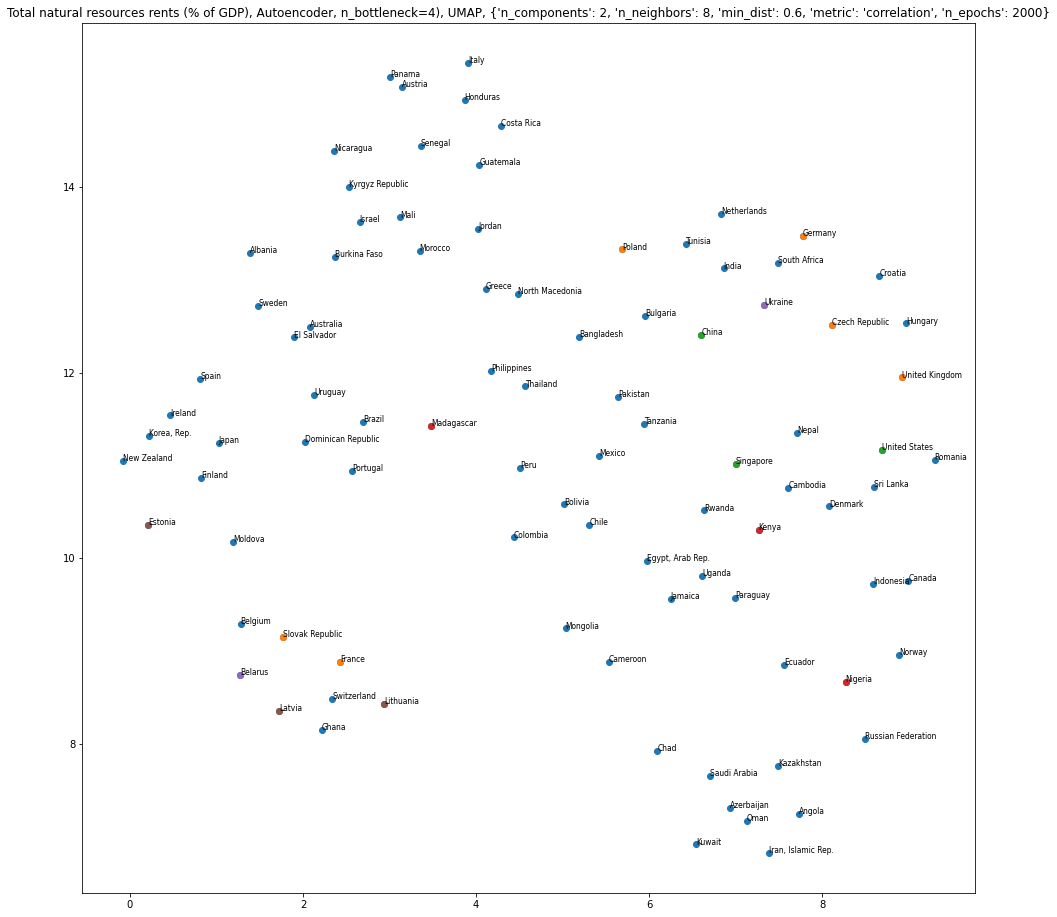

Unemployment, total (% of total labor force) (modeled ILO estimate)
-----------------------------------------
Autoencoder, n_bottleneck=4)
-----------------------------------------


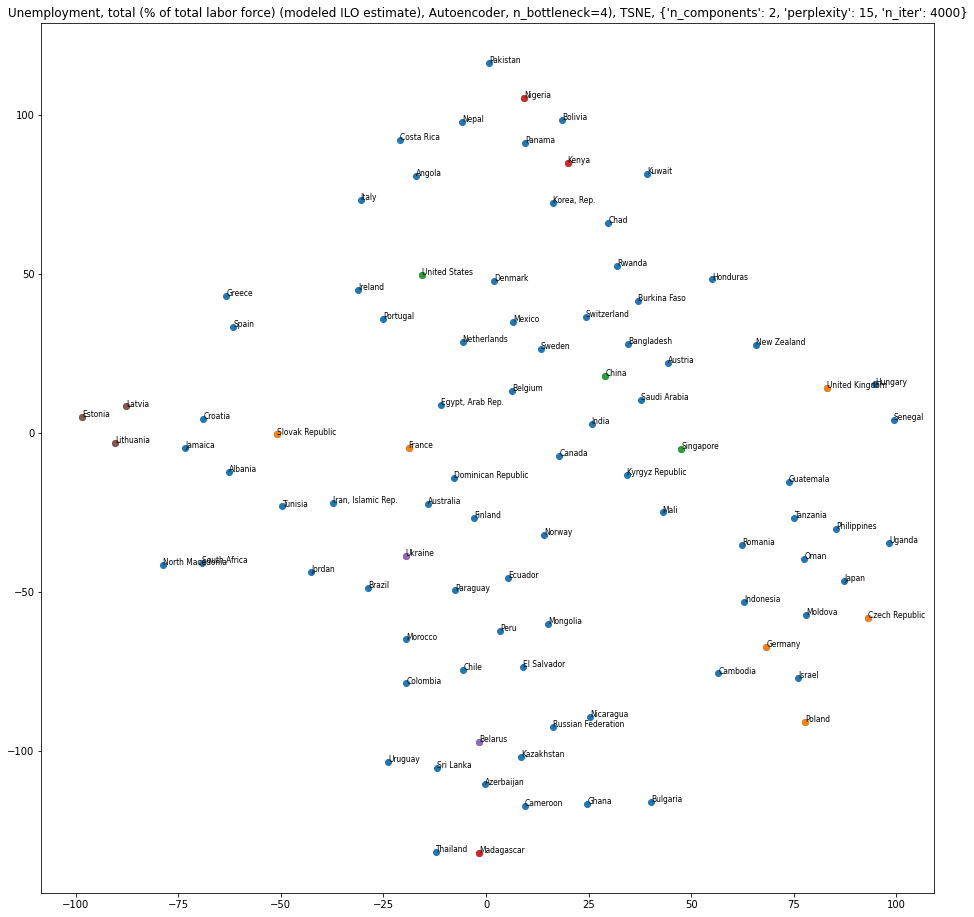

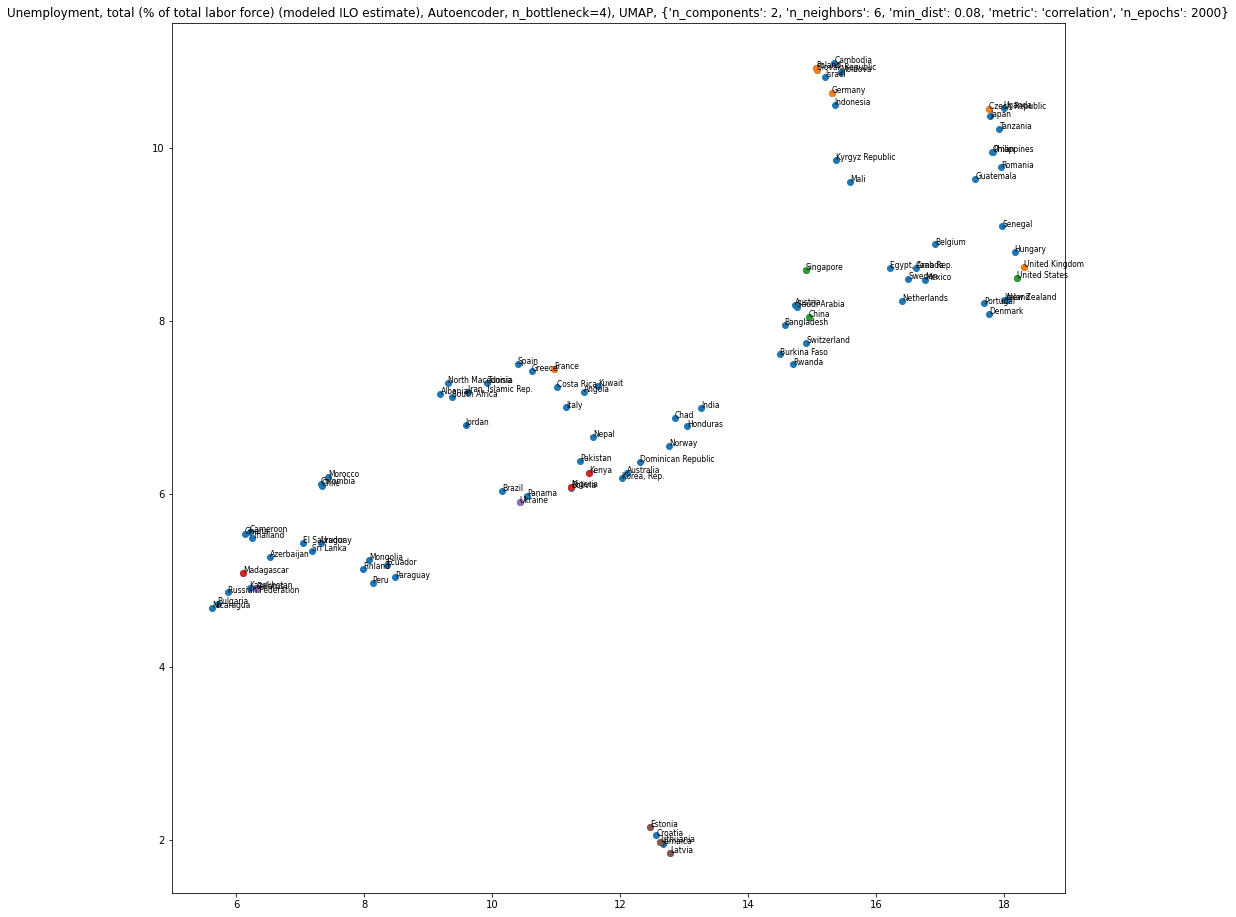

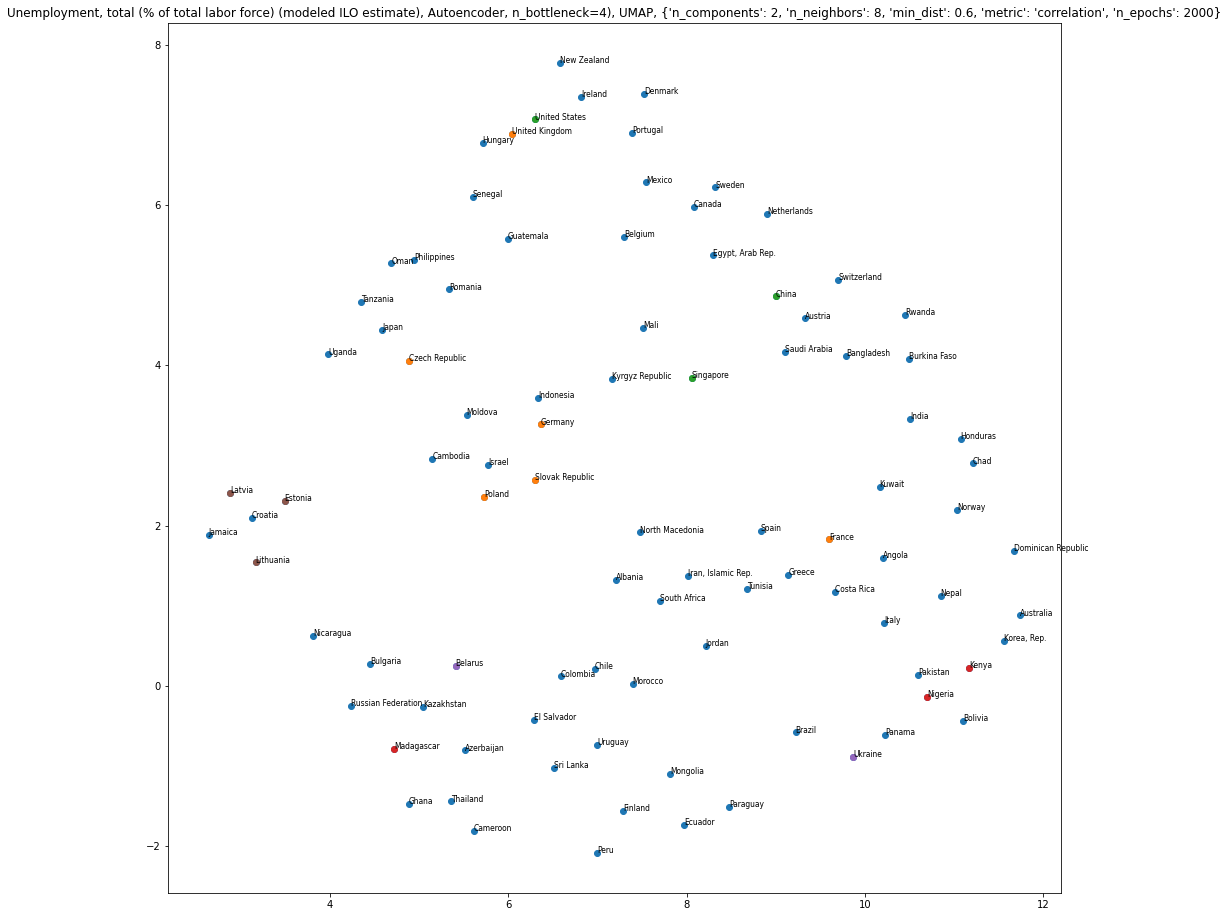

In [6]:
for feature in FEATURES:
    print(
        "========================================================================================================================="
    )
    print(
        "========================================================================================================================="
    )
    print(
        "========================================================================================================================="
    )
    print(feature)
    print(
        "========================================================================================================================="
    )

    for extractor_fun in EXTRACTORS:
        extractor = extractor_fun(feature)
        print("-----------------------------------------")
        extractor_title = (
            "No extraction"
            if extractor is None
            else f"Autoencoder, n_bottleneck={extractor.autoencoder.n_bottleneck})"
        )
        print(extractor_title)
        print("-----------------------------------------")

        for alg, alg_args in zip(ALGS, ALG_ARGS):
            Y = time_series_dict[feature]
            if extractor is not None:
                Y = extractor.extract_features(Y)

            Y_projected = alg(**alg_args).fit_transform(Y)
            title = f"{feature}, {extractor_title}, {alg.__name__}, {alg_args}"
            plot_with_names(Y_projected, countries, title=title)

# All time series types

In [11]:
INPUT_LEN = 21

EXTRACTORS = [
    # lambda f: None,
    # lambda f: AutoencoderExtractor(n_bottleneck=2, feature=f, root=pwd, input_len=INPUT_LEN),
    lambda f: AutoencoderExtractor(
        n_bottleneck=4, feature="all", root=pwd, input_len=INPUT_LEN
    ),
    lambda f: AutoencoderExtractor(
        n_bottleneck=4, feature=feature, root=pwd, input_len=INPUT_LEN
    ),
    # lambda f: AutoencoderExtractor(n_bottleneck=8, feature=f, root=pwd, input_len=INPUT_LEN)
]

ALGS = [
    TSNE,
    # MDS,
    UMAP,
    UMAP,
]
ALG_ARGS = [
    {"n_components": 2, "perplexity": 15, "n_iter": 4000},
    # {'n_components': 2},
    {
        "n_components": 2,
        "n_neighbors": 6,
        "min_dist": 0.1,
        "metric": "correlation",
        "n_epochs": 2000,
    },
    {
        "n_components": 2,
        "n_neighbors": 6,
        "min_dist": 0.4,
        "metric": "correlation",
        "n_epochs": 2000,
    },
]

-----------------------------------------
-----------------------------------------
Autoencoder, n_bottleneck=4)
-----------------------------------------


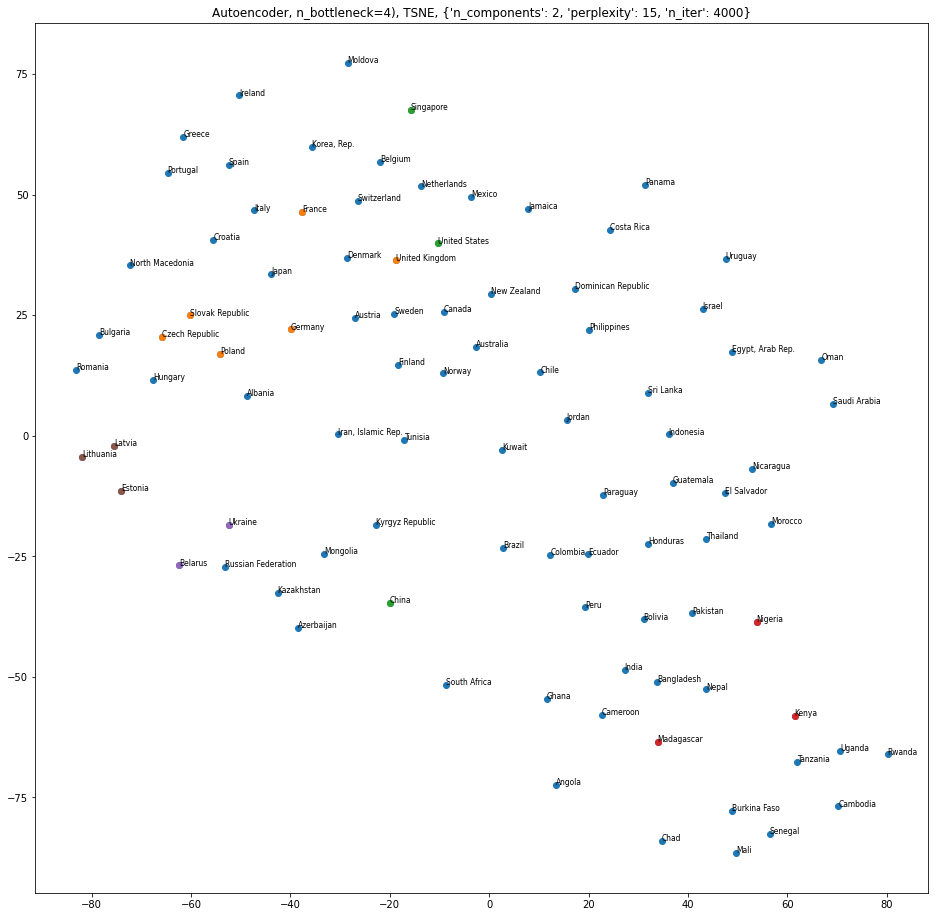

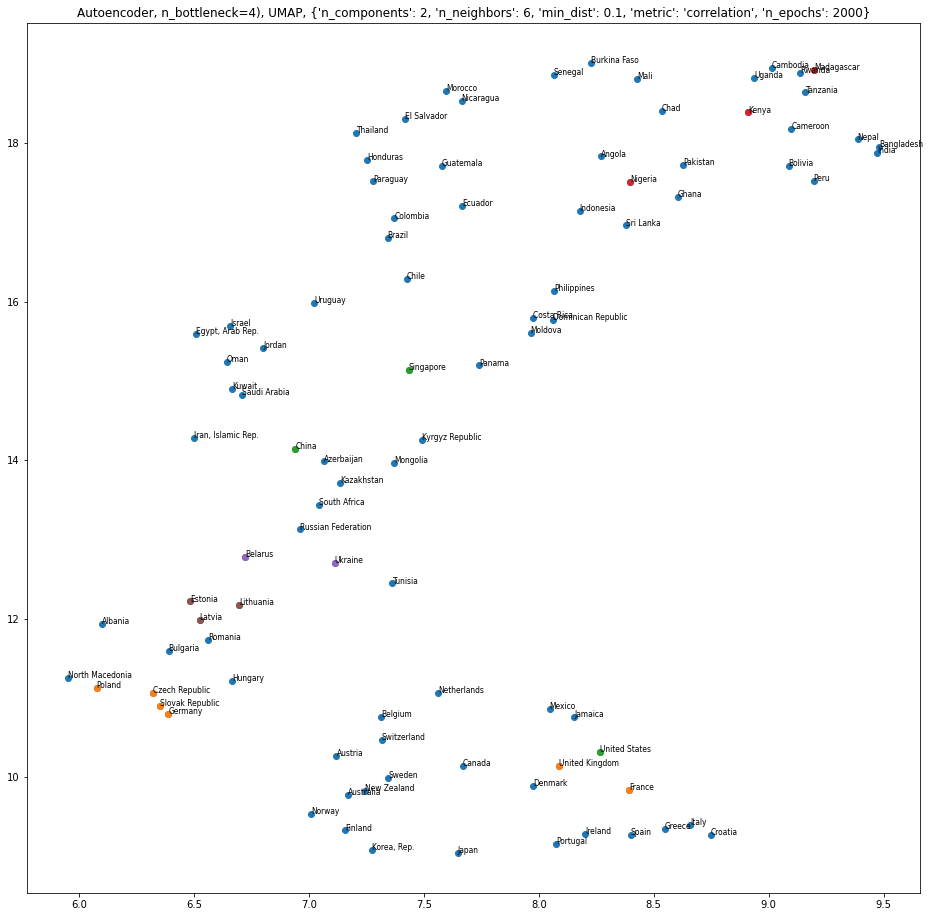

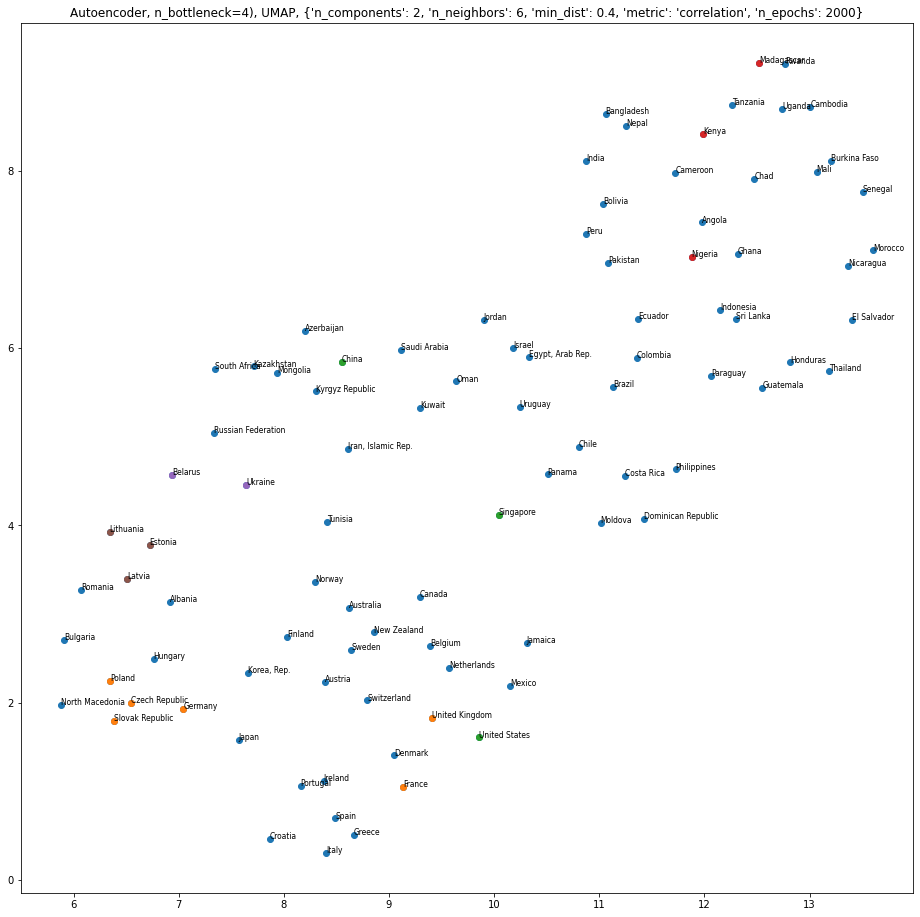

-----------------------------------------
-----------------------------------------
Autoencoder, n_bottleneck=4)
-----------------------------------------


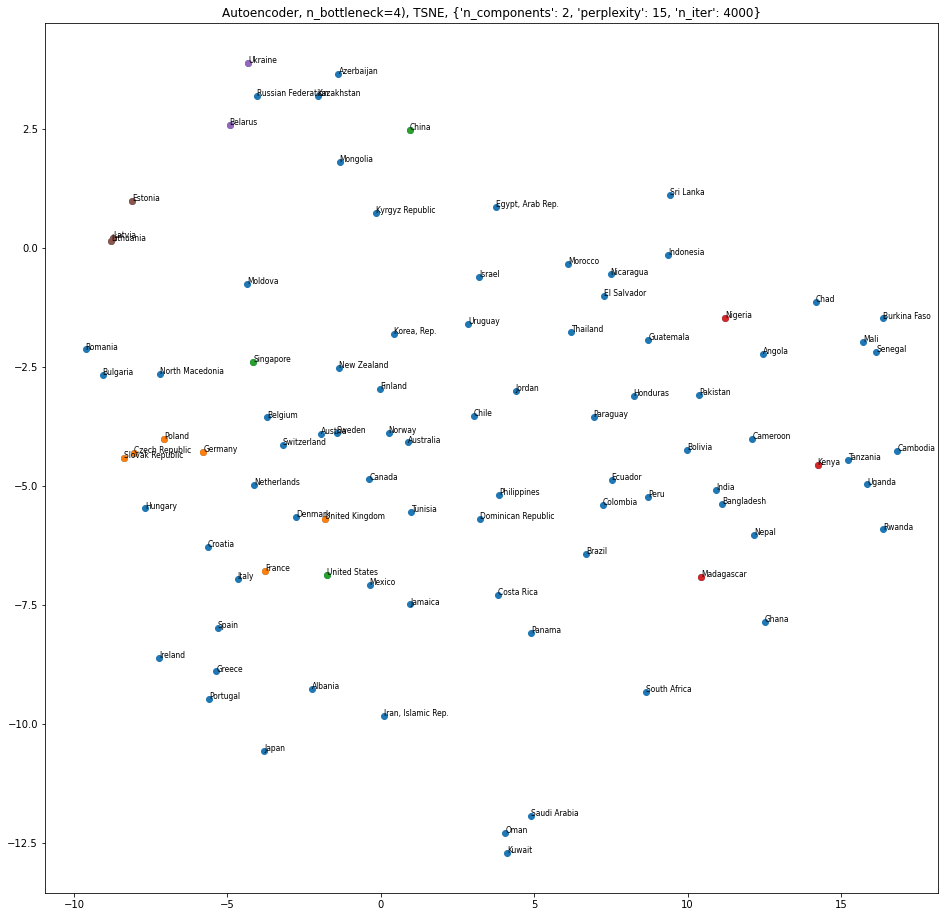

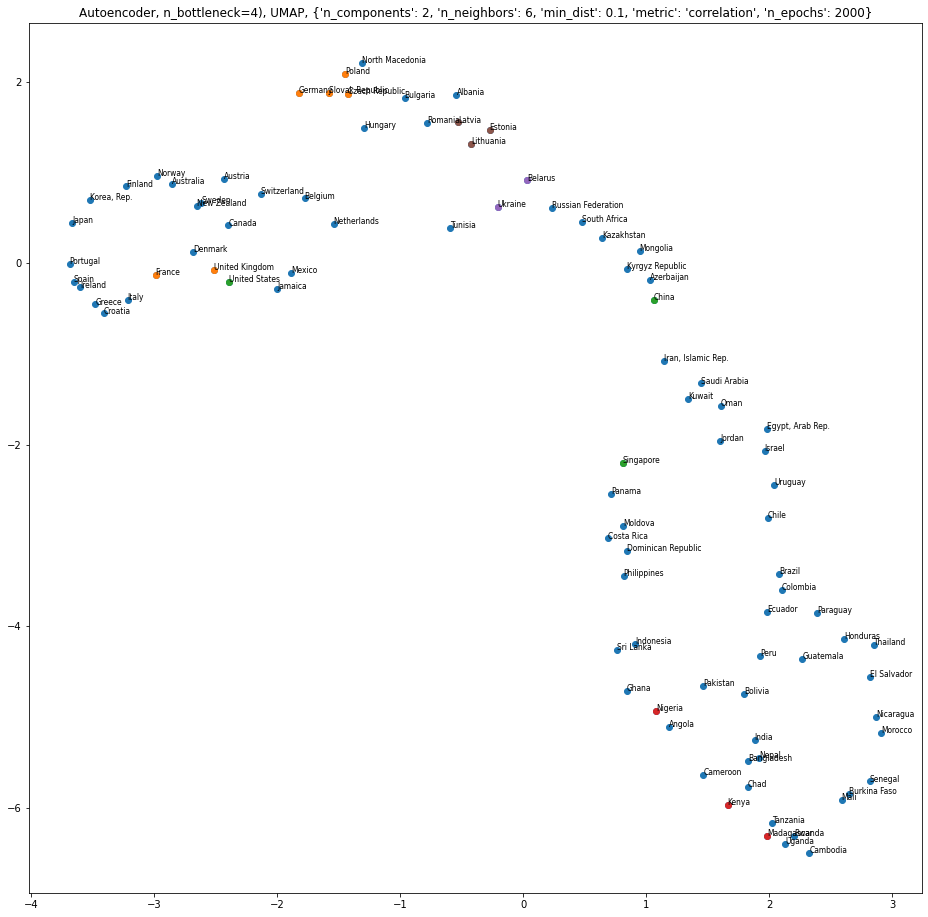

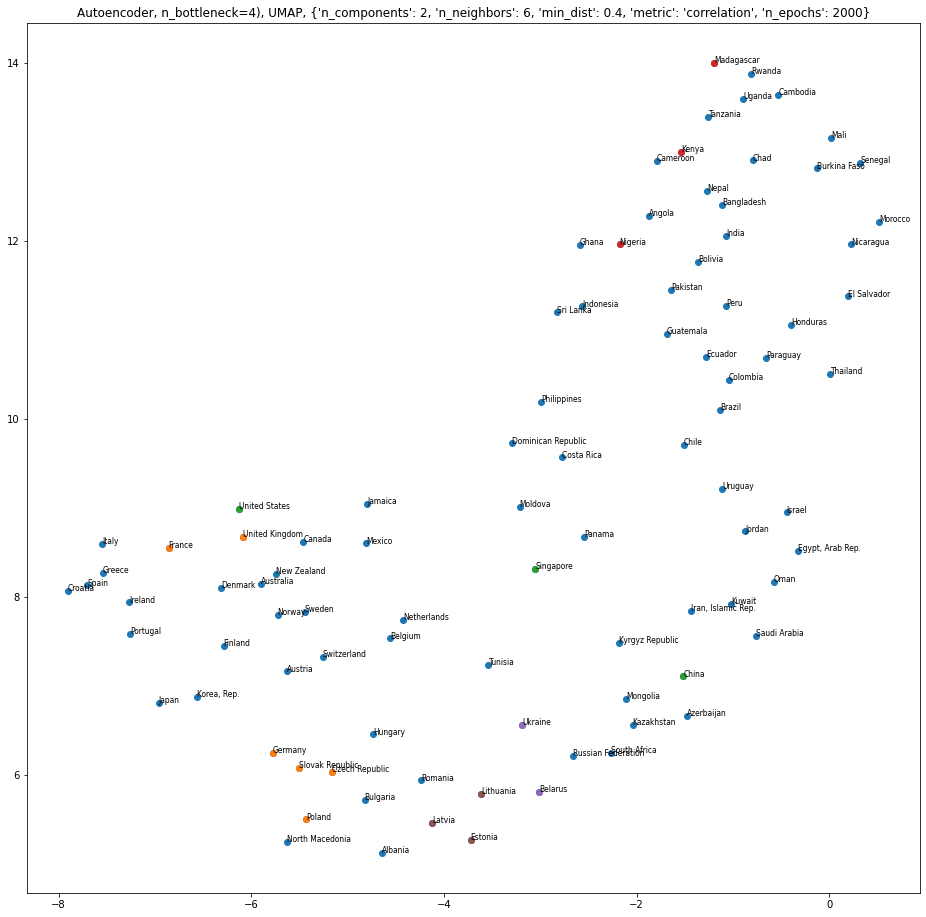

In [12]:
for extractor_fun in EXTRACTORS:
    print("-----------------------------------------")
    print("-----------------------------------------")
    extractor_title = (
        "No extraction"
        if extractor_fun("all") is None
        else f"Autoencoder, n_bottleneck={extractor_fun('all').autoencoder.n_bottleneck})"
    )
    print(extractor_title)
    print("-----------------------------------------")

    for alg, alg_args in zip(ALGS, ALG_ARGS):
        Y = extract_from_all(extractor_fun)

        Y_projected = alg(**alg_args).fit_transform(Y)
        title = f"{extractor_title}, {alg.__name__}, {alg_args}"
        plot_with_names(Y_projected, countries, title=title)